Colibri Wireless is Inertia Measurement Unit. It carries 3-axis state-of-art sensors to measure acceleration, angular rate and magnetic field. It has a built in tremperature. Data was collected from 9 subject, each subject had to follow a protocol of 12 different activities ranging from everyday activities, sport, and varieties of other activities. The IMU was used to collect data on different part of the body which are the wrist,chest and ankle. The data would be read into this notebook, it would be wrangled and cleaned.

EDA would be done to see patterns and outliers, we would see what correlates and features that has relationships and that have been effective.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from scipy import stats
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
import itertools
import warnings

In [2]:
# initialising dataframe
header=['timestamp', 'activityID', 'heart-rate bpm', 'hand-temp', '1hand-3D-acc ±16g-13bit', '2hand-3D-acc ±16g-13bit','3hand-3D-acc ±16g-13bit', '1hand-3D-acc ±6g-13bit',
              '2hand-3D-acc ±6g-13bit', '3hand-3D-acc ±6g-13bit', '1hand-3D-gyroscope', '2hand-3D-gyroscope', '3hand-3D-gyroscope', '1hand-3D-magnetometer', '2hand-3D-magnetometer', '3hand-3D-magnetometer', 
             '1hand(invalid)', '2hand(invalid)', '3hand(invalid)', '4hand(invalid)', 'chest-temp', '1chest-3D-acc ±16g-13bit', '2chest-3D-acc ±16g-13bit', '3chest-3D-acc ±16g-13bit',
             '1chest-3D-acc ±6g-13bit', '2chest-3D-acc ±6g-13bit', '3chest-3D-acc ±6g-13bit', '1chest-3D-gyroscope', '2chest-3D-gyroscope', '3chest-3D-gyroscope', '1chest-3D-magnetometer', '2chest-3D-magnetometer', '3chest-3D-magnetometer',
             '1chest(invalid)', '2chest(invalid)', '3chest(invalid)', '4chest(invalid)', 'ankle-temp', '1ankle-3D-acc ±16g-13bit', '2ankle-3D-acc ±16g-13bit', '3ankle-3D-acc ±16g-13bit', '1ankle-3D-acc ±6g-13bit',
             '2ankle-3D-acc ±6g-13bit', '3ankle-3D-acc ±6g-13bit', '1ankle-3D-gyroscope', '2ankle-3D-gyroscope', '3ankle-3D-gyroscope', '1ankle-3D-magnetometer', '2ankle-3D-magnetometer', '3ankle-3D-magnetometer', '1ankle(invalid)',
             '2ankle(invalid)', '3ankle(invalid)', '4ankle(invalid)']
df=pd.DataFrame(columns=header)
df.insert(loc=0,column='Subject_ID',value="")

# Importing data
for i in np.arange(1, 10, 1):
    df1 = pd.read_csv(f"C:\\Users\\qs60\\OneDrive - University of Sussex\\Data Science Research Method\\DSRM Report\\Protocol\\subject1{i:0>2d}.dat", names=header, delimiter=" ")
    df1.insert(loc=0, column='Subject_ID', value=f"1{i:0>2d}")
    df = pd.concat([df, df1], ignore_index=True)  # Using concat instead of append
    del df1


In this cell a new dataframe was created, called df. The data was then imported in a dataframe and header was created/named in other to store items in a column. Read different data named subject101.dat to subject109 and looped over them, concatenating them using the pd.concat into the df, then droping df1 which was the imported data

#### Wrangling and Cleaning data

In [3]:
columns_drop = ["1hand(invalid)", "2hand(invalid)", "3hand(invalid)", '4hand(invalid)', '1chest(invalid)','2chest(invalid)',
               '3chest(invalid)','4chest(invalid)','1ankle(invalid)','2ankle(invalid)', '3ankle(invalid)', '4ankle(invalid)',
               '1hand-3D-acc ±6g-13bit','2hand-3D-acc ±6g-13bit','3hand-3D-acc ±6g-13bit','1chest-3D-acc ±6g-13bit',
               '2chest-3D-acc ±6g-13bit', '3chest-3D-acc ±6g-13bit','1ankle-3D-acc ±6g-13bit','2ankle-3D-acc ±6g-13bit', '3ankle-3D-acc ±6g-13bit']

# Drop specified columns
df.drop(columns=columns_drop, inplace=True)

The invalid columns were dropped because they are invalid,so i removed them from the dataset. From the report data it says that the 6g acceleration gets saturated from some activities due to how it was calibrated and it recommended we use the 16g acceration. So i dropped the 6g acceleration because it is presumed the 16g acceleration  would perform more effectively. Invalid readings where dropped for the hands, chest and ankle. Nan values where dropped.

In [4]:
# Drop rows with NaN values in specific columns
column= ['Subject_ID', 'timestamp', 'activityID', 'hand-temp',
       '1hand-3D-acc ±16g-13bit', '2hand-3D-acc ±16g-13bit',
       '3hand-3D-acc ±16g-13bit', '1hand-3D-gyroscope', '2hand-3D-gyroscope',
       '3hand-3D-gyroscope', '1hand-3D-magnetometer', '2hand-3D-magnetometer',
       '3hand-3D-magnetometer', 'chest-temp', '1chest-3D-acc ±16g-13bit',
       '2chest-3D-acc ±16g-13bit', '3chest-3D-acc ±16g-13bit',
       '1chest-3D-gyroscope', '2chest-3D-gyroscope', '3chest-3D-gyroscope',
       '1chest-3D-magnetometer', '2chest-3D-magnetometer',
       '3chest-3D-magnetometer', 'ankle-temp', '1ankle-3D-acc ±16g-13bit',
       '2ankle-3D-acc ±16g-13bit', '3ankle-3D-acc ±16g-13bit',
       '1ankle-3D-gyroscope', '2ankle-3D-gyroscope', '3ankle-3D-gyroscope',
       '1ankle-3D-magnetometer', '2ankle-3D-magnetometer',
       '3ankle-3D-magnetometer']
df.dropna(subset=column, inplace=True) #drop all the nan values


In [5]:
pd.unique(df.activityID)

array([0, 1, 2, 3, 17, 16, 12, 13, 4, 7, 6, 5, 24], dtype=object)

From the data set we had activities labeled 1-24 which are the activities we are using and working with. I dropped activities labelled 0 in the next cell.

In [6]:
df = df[df.activityID != 0] #drop all activityID with 0
df.drop(df.loc[df.activityID == 0].index, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1921431 entries, 2928 to 2872019
Data columns (total 34 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Subject_ID                object 
 1   timestamp                 float64
 2   activityID                object 
 3   heart-rate bpm            float64
 4   hand-temp                 float64
 5   1hand-3D-acc ±16g-13bit   float64
 6   2hand-3D-acc ±16g-13bit   float64
 7   3hand-3D-acc ±16g-13bit   float64
 8   1hand-3D-gyroscope        float64
 9   2hand-3D-gyroscope        float64
 10  3hand-3D-gyroscope        float64
 11  1hand-3D-magnetometer     float64
 12  2hand-3D-magnetometer     float64
 13  3hand-3D-magnetometer     float64
 14  chest-temp                float64
 15  1chest-3D-acc ±16g-13bit  float64
 16  2chest-3D-acc ±16g-13bit  float64
 17  3chest-3D-acc ±16g-13bit  float64
 18  1chest-3D-gyroscope       float64
 19  2chest-3D-gyroscope       float64
 20  3chest-3D-gyroscope  

In [8]:
#df[df['Subject_ID'] == '106']


In [9]:
print(df.count())

Subject_ID                  1921431
timestamp                   1921431
activityID                  1921431
heart-rate bpm               175498
hand-temp                   1921431
1hand-3D-acc ±16g-13bit     1921431
2hand-3D-acc ±16g-13bit     1921431
3hand-3D-acc ±16g-13bit     1921431
1hand-3D-gyroscope          1921431
2hand-3D-gyroscope          1921431
3hand-3D-gyroscope          1921431
1hand-3D-magnetometer       1921431
2hand-3D-magnetometer       1921431
3hand-3D-magnetometer       1921431
chest-temp                  1921431
1chest-3D-acc ±16g-13bit    1921431
2chest-3D-acc ±16g-13bit    1921431
3chest-3D-acc ±16g-13bit    1921431
1chest-3D-gyroscope         1921431
2chest-3D-gyroscope         1921431
3chest-3D-gyroscope         1921431
1chest-3D-magnetometer      1921431
2chest-3D-magnetometer      1921431
3chest-3D-magnetometer      1921431
ankle-temp                  1921431
1ankle-3D-acc ±16g-13bit    1921431
2ankle-3D-acc ±16g-13bit    1921431
3ankle-3D-acc ±16g-13bit    

In [10]:
heart_rate_missing_count = df['heart-rate bpm'].isna().sum()
print("There are " + f'{heart_rate_missing_count:,.0f}' + " missing heart rate records due to differences in frequency.")


There are 1,745,933 missing heart rate records due to differences in frequency.


In [11]:
df_fill = df.copy()

# Perform backward fill
df_fill['heart-rate bpm'] = df_fill['heart-rate bpm'].fillna(method='bfill')

count = df_fill.isna().any(axis=1).sum()
data_set_size = df_fill.shape[0]

print(f"After filling the missing heart data, there are {count:,.0f} "
      f"records missing one or more values, out of a data set of size {data_set_size:,.0f}.")

# Create a new DataFrame (df_cleaned) by dropping rows with any missing values
df_cleaned = df_fill.dropna()


After filling the missing heart data, there are 1 records missing one or more values, out of a data set of size 1,921,431.


In [12]:
#drop duplicate based on timestamp and heart-rate
df_cleaned = df_cleaned.copy()

# Drop duplicates on the copy
df_cleaned.drop_duplicates(subset=["timestamp", "Subject_ID"], inplace=True)



From the heart rate, I noticed about 1,745,933 missing values and this is because IMU data was collected every 0.01 sec which indacates IMU has a sampling frequency of 100HZ and the heart rate was collected and had sampling frequency of 9HZ with this information, if I should drop the values it would be a lot of information dropped and it would loose insight to the data/IMU features. What was done to fill the missing values was backward fill. It fills it with the next available value at particular timestamp. Backward fill has its limitations but would be good for this purpose. After filling the missing value with the backward fill, still had 1 more value which wasnt filled, so that was dropped.

In [13]:
print(df_cleaned.count())

Subject_ID                  1921430
timestamp                   1921430
activityID                  1921430
heart-rate bpm              1921430
hand-temp                   1921430
1hand-3D-acc ±16g-13bit     1921430
2hand-3D-acc ±16g-13bit     1921430
3hand-3D-acc ±16g-13bit     1921430
1hand-3D-gyroscope          1921430
2hand-3D-gyroscope          1921430
3hand-3D-gyroscope          1921430
1hand-3D-magnetometer       1921430
2hand-3D-magnetometer       1921430
3hand-3D-magnetometer       1921430
chest-temp                  1921430
1chest-3D-acc ±16g-13bit    1921430
2chest-3D-acc ±16g-13bit    1921430
3chest-3D-acc ±16g-13bit    1921430
1chest-3D-gyroscope         1921430
2chest-3D-gyroscope         1921430
3chest-3D-gyroscope         1921430
1chest-3D-magnetometer      1921430
2chest-3D-magnetometer      1921430
3chest-3D-magnetometer      1921430
ankle-temp                  1921430
1ankle-3D-acc ±16g-13bit    1921430
2ankle-3D-acc ±16g-13bit    1921430
3ankle-3D-acc ±16g-13bit    

In [14]:
df_cleaned[['timestamp', 'heart-rate bpm','activityID']]


,timestamp,heart-rate bpm,activityID
2928,37.66,100.0,1
2929,37.67,100.0,1
2930,37.68,100.0,1
2931,37.69,100.0,1
2932,37.70,100.0,1
...,...,...,...
2872014,95.05,162.0,24
2872015,95.06,162.0,24
2872016,95.07,162.0,24
2872017,95.08,162.0,24


### Activites

In [15]:
activity = {1: 'lying', 2: 'sitting', 3: 'standing', 4: 'walking', 5: 'running', 6: 'cycling', 7: 'Nordic walking', 9: 'watching TV', 10: 'computer work', 11: 'car driving', 12: 'ascending stairs', 13: 'descending stairs', 16: 'vacuum cleaning', 17: 'ironing', 18: 'folding laundry', 19: 'house cleaning', 20: 'playing soccer', 24: 'rope jumping'}
df_cleaned.loc[:, 'activity'] = df_cleaned['activityID'].map(activity)
df_cleaned.insert(3, 'activity', df_cleaned.pop('activity'))
df_cleaned.loc[:,'heart-rate bpm'] = df_cleaned['heart-rate bpm'].round()

In [16]:
df_cleaned[df_cleaned['Subject_ID'] == '101']


,Subject_ID,timestamp,activityID,activity,heart-rate bpm,hand-temp,1hand-3D-acc ±16g-13bit,2hand-3D-acc ±16g-13bit,3hand-3D-acc ±16g-13bit,1hand-3D-gyroscope,...,ankle-temp,1ankle-3D-acc ±16g-13bit,2ankle-3D-acc ±16g-13bit,3ankle-3D-acc ±16g-13bit,1ankle-3D-gyroscope,2ankle-3D-gyroscope,3ankle-3D-gyroscope,1ankle-3D-magnetometer,2ankle-3D-magnetometer,3ankle-3D-magnetometer
2928,101,37.66,1,lying,100.0,30.3750,2.21530,8.27915,5.58753,-0.004750,...,30.7500,9.73855,-1.84761,0.095156,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696
2929,101,37.67,1,lying,100.0,30.3750,2.29196,7.67288,5.74467,-0.171710,...,30.7500,9.69762,-1.88438,-0.020804,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656
2930,101,37.68,1,lying,100.0,30.3750,2.29090,7.14240,5.82342,-0.238241,...,30.7500,9.69633,-1.92203,-0.059173,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119
2931,101,37.69,1,lying,100.0,30.3750,2.21800,7.14365,5.89930,-0.192912,...,30.7500,9.66370,-1.84714,0.094385,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799
2932,101,37.70,1,lying,100.0,30.3750,2.30106,7.25857,6.09259,-0.069961,...,30.7500,9.77578,-1.88582,0.095775,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361795,101,3626.33,24,rope jumping,96.0,30.1875,2.51550,7.02650,5.78869,-0.469234,...,33.1875,9.84361,1.84234,-0.852816,-0.018273,0.000864,0.018507,-56.3324,-29.6397,34.1311
361796,101,3626.34,24,rope jumping,96.0,30.1875,2.50643,6.30465,5.67552,-0.512432,...,33.1875,9.76526,1.80581,-0.969161,-0.037873,-0.022418,-0.017999,-55.7786,-29.1093,34.2560
361797,101,3626.35,24,rope jumping,96.0,30.1875,2.54102,5.84908,5.67758,-0.458393,...,33.1875,9.91807,1.76593,-0.851578,0.059283,-0.050002,0.005630,-55.5371,-29.5769,35.6106
361798,101,3626.36,24,rope jumping,96.0,30.1875,2.65866,5.88715,5.79468,-0.418556,...,33.1875,10.06840,1.87889,-0.850738,0.049326,-0.016209,0.016162,-56.4328,-30.1943,34.6211


In [17]:
df_info = pd.DataFrame(data=[[101,'Male',27,182,83,75,193,'right'],
                            [102,'Female',25,169,78,74,195,'right'],
                            [103,'Male',31,187,92,68,189,'right'],
                            [104,'Male',24,194,95,58,196,'right'],
                            [105,'Male',26,180,73,70,194,'right'],
                            [106,'Male',26,183,69,60,194,'right'],
                            [107,'Male',23,173,86,60,197,'right'],
                            [108,'Male',32,179,87,66,188,'left'],
                            [109,'Male',31,168,65,54,189,'right']],
                            columns=['Subject_ID','Sex','Age','Height_cm','Weight_kg','Resting_HR_bpm','Max_HR_bpm','Dominant_hand'])


# Dictionary mapping activity to MET values
activity_MET_dict_custom = {'lying': 1, 'sitting': 1.8, 'standing': 1.8, 'walking': 3.55, 'running': 7.5, 'cycling': 4, 
                            'Nordic walking': 5.5, 'watching TV': 1, 'computer work': 1.8, 'car driving': 1.8, 
                            'ascending stairs': 8, 'descending stairs': 3, 'vacuum cleaning': 3.5, 'ironing': 2.3, 
                            'folding laundry': 2.3, 'house cleaning': 3.5, 'playing soccer': 7.5, 'rope jumping': 9}

MET_values = df_cleaned['activity'].map(activity_MET_dict_custom)
 
df_cleaned.insert(loc=2, column='MET', value=MET_values)

#print(df_cleaned)




In [18]:
df_cleaned.head()

,Subject_ID,timestamp,MET,activityID,activity,heart-rate bpm,hand-temp,1hand-3D-acc ±16g-13bit,2hand-3D-acc ±16g-13bit,3hand-3D-acc ±16g-13bit,...,ankle-temp,1ankle-3D-acc ±16g-13bit,2ankle-3D-acc ±16g-13bit,3ankle-3D-acc ±16g-13bit,1ankle-3D-gyroscope,2ankle-3D-gyroscope,3ankle-3D-gyroscope,1ankle-3D-magnetometer,2ankle-3D-magnetometer,3ankle-3D-magnetometer
2928,101,37.66,1.0,1,lying,100.0,30.375,2.21530,8.27915,5.58753,...,30.75,9.73855,-1.84761,0.095156,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696
2929,101,37.67,1.0,1,lying,100.0,30.375,2.29196,7.67288,5.74467,...,30.75,9.69762,-1.88438,-0.020804,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656
2930,101,37.68,1.0,1,lying,100.0,30.375,2.29090,7.14240,5.82342,...,30.75,9.69633,-1.92203,-0.059173,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119
2931,101,37.69,1.0,1,lying,100.0,30.375,2.21800,7.14365,5.89930,...,30.75,9.66370,-1.84714,0.094385,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799
2932,101,37.70,1.0,1,lying,100.0,30.375,2.30106,7.25857,6.09259,...,30.75,9.77578,-1.88582,0.095775,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847


In [19]:
pd.unique(df_cleaned['activity'])

array(['lying', 'sitting', 'standing', 'ironing', 'vacuum cleaning',
       'ascending stairs', 'descending stairs', 'walking',
       'Nordic walking', 'cycling', 'running', 'rope jumping'],
      dtype=object)

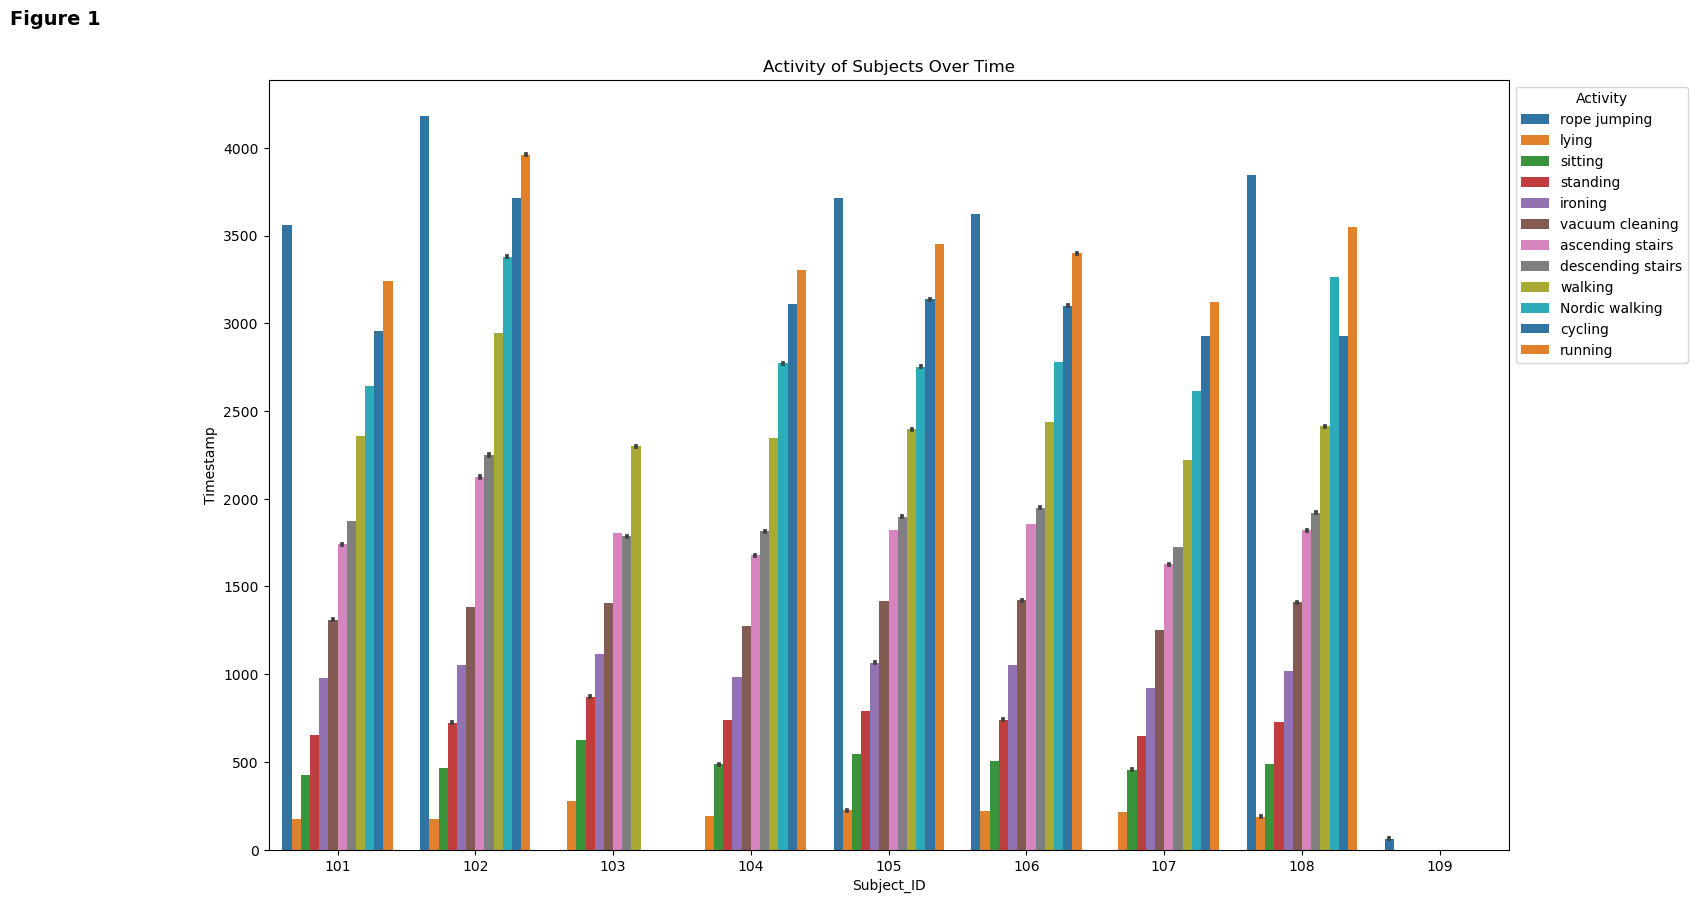

In [20]:
# Filter the DataFrame based on the condition
subset_df = df_cleaned[df_cleaned['Subject_ID'].isin(['101', '102', '103', '104', '105', '106', '107', '108', '109'])]

# Set the order of subjects for better plotting
subject_order = ['101', '102', '103', '104', '105', '106', '107', '108', '109']
activity_order=['rope jumping', 'lying', 'sitting', 'standing', 'ironing','vacuum cleaning', 'ascending stairs', 'descending stairs','walking', 'Nordic walking', 'cycling', 'running']
pastel_palette = sns.color_palette()

# Plotting
plt.figure(figsize=(16, 10))
sns.barplot(x='Subject_ID', y='timestamp', hue='activity', data=subset_df, hue_order=activity_order,palette=pastel_palette)
plt.xlabel('Subject_ID')
plt.ylabel('Timestamp')
plt.title('Activity of Subjects Over Time')
plt.legend(title='Activity', bbox_to_anchor=(1, 1))
plt.text(0.02, 0.95, 'Figure 1', transform=plt.gcf().transFigure, fontsize=14, fontweight='bold',ha='right', va='top')
plt.show()


In [21]:
#df_cleaned['activity'] = df_cleaned['activityID'].astype(float)
#df_cleaned['activityID'] = df_cleaned['timestamp'].astype(float)
#df_cleaned['Subject_ID'] = df_cleaned['Subject_ID'].astype(float)

In [22]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1921430 entries, 2928 to 2872018
Data columns (total 36 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Subject_ID                object 
 1   timestamp                 float64
 2   MET                       float64
 3   activityID                object 
 4   activity                  object 
 5   heart-rate bpm            float64
 6   hand-temp                 float64
 7   1hand-3D-acc ±16g-13bit   float64
 8   2hand-3D-acc ±16g-13bit   float64
 9   3hand-3D-acc ±16g-13bit   float64
 10  1hand-3D-gyroscope        float64
 11  2hand-3D-gyroscope        float64
 12  3hand-3D-gyroscope        float64
 13  1hand-3D-magnetometer     float64
 14  2hand-3D-magnetometer     float64
 15  3hand-3D-magnetometer     float64
 16  chest-temp                float64
 17  1chest-3D-acc ±16g-13bit  float64
 18  2chest-3D-acc ±16g-13bit  float64
 19  3chest-3D-acc ±16g-13bit  float64
 20  1chest-3D-gyroscope  

Activities column was created to specify specific activities with it's ID. Met value was also inclede to the column. MET which is the metabolic equivalent of a task, it expesses the energy cost of diffent activities which I found useful because the activity ID is categorical and the MET would tell you the enery cost for each activity. Figure 1 is a barplot of subjectID, Timestamp and activities. Fropm the plot you could see activities each subject performed. Subject 103 did a little of each activities while Subject 109 didnt perform any activity. ropejumping was the most performed acivities from all subjects followed by Lying and Nordic walk. 

### EDA for heart-rate

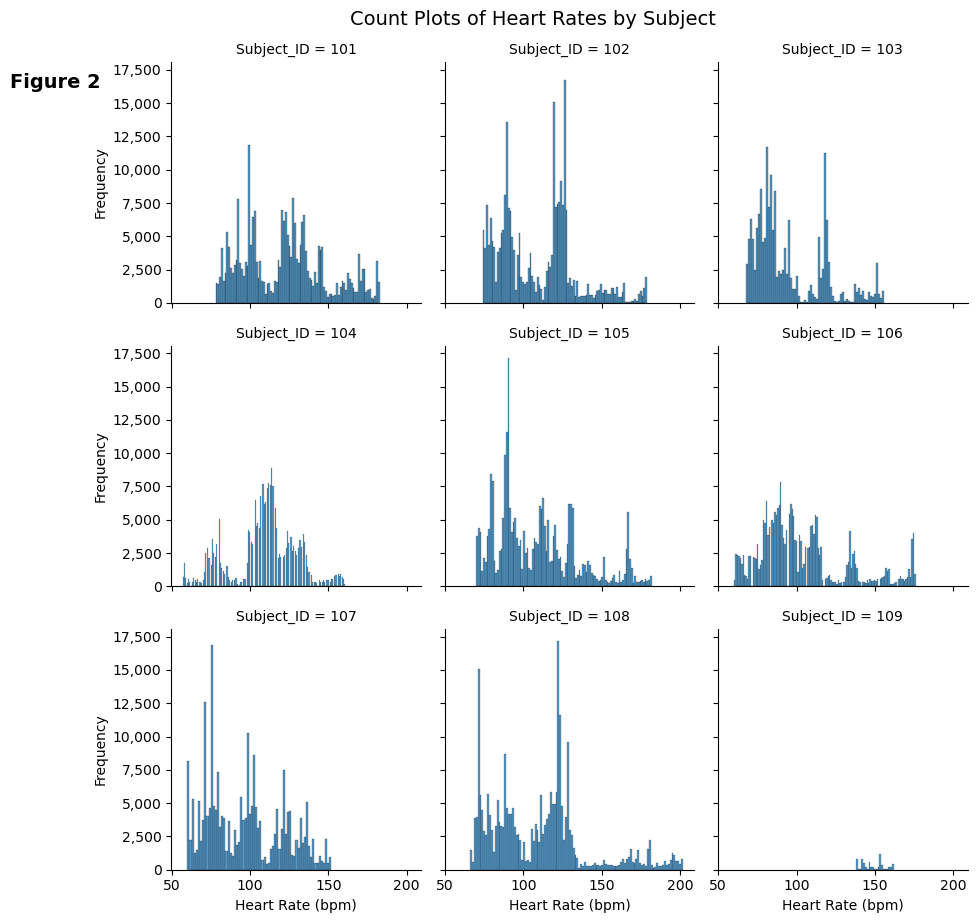

In [23]:
g = sns.FacetGrid(df_cleaned[['Subject_ID', 'heart-rate bpm']], col='Subject_ID', col_wrap=3)

g.map(sns.histplot, 'heart-rate bpm')
g.set_axis_labels("Heart Rate (bpm)", "Frequency")
g.fig.suptitle('Count Plots of Heart Rates by Subject', x=0.5, y=1.02, fontsize=14)

# Format y-axis labels
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, p: f'{y:,.0f}'.format(y)))

plt.text(0.02, 0.95, 'Figure 2', transform=plt.gcf().transFigure, fontsize=14, fontweight='bold',ha='right', va='top')

# Show the plot
plt.show()

EDA for heart-rate based on the subjectID and from the above histplot 102,105,107, and 108 had a spread in distribution, which means the subject performed most of the activities and we could see a peak in some of the subjectID. This could be due to some activities that makes use of a lot of energy, hence the increase in the heartbeat. Subject 105 has a prominent peak around 105 bpm and 107 and 108 shows a spread in the distribution. Subject 109 had little or no heartbeat, this could be due to subject 109 not performing in any activities

### Mean

In [24]:
columns_to_acc_hand = ['1hand-3D-acc ±16g-13bit', '2hand-3D-acc ±16g-13bit', '3hand-3D-acc ±16g-13bit']
columns_to_acc_chest = ['1chest-3D-acc ±16g-13bit', '2chest-3D-acc ±16g-13bit', '3chest-3D-acc ±16g-13bit']
columns_to_acc_ankle= ["1ankle-3D-acc ±16g-13bit", "2ankle-3D-acc ±16g-13bit", "3ankle-3D-acc ±16g-13bit"]
columns_to_gyro_hand = ['1hand-3D-gyroscope', '2hand-3D-gyroscope', '3hand-3D-gyroscope']
columns_to_gyro_chest=['1chest-3D-gyroscope', '2chest-3D-gyroscope', '3chest-3D-gyroscope']
columns_to_gyro_ankle= ['1ankle-3D-gyroscope', '2ankle-3D-gyroscope', '3ankle-3D-gyroscope']
columns_to_mag_hand= ['1hand-3D-magnetometer', '2hand-3D-magnetometer','3hand-3D-magnetometer']
columns_to_mag_chest=['1chest-3D-magnetometer', '2chest-3D-magnetometer','3chest-3D-magnetometer']
columns_to_mag_ankle= [ '1ankle-3D-magnetometer', '2ankle-3D-magnetometer','3ankle-3D-magnetometer']
                        
df_cleaned['hand-3D-acc ±16g-13bit'] = df_cleaned[columns_to_acc_hand].mean(axis=1)
df_cleaned['chest-3D-acc ±16g-13bit'] = df_cleaned[columns_to_acc_chest].mean(axis=1)
df_cleaned['ankle-3D-acc ±16g-13bit'] = df_cleaned[columns_to_acc_ankle].mean(axis=1)
df_cleaned['hand-3D-gyroscope'] = df_cleaned[columns_to_gyro_hand].mean(axis=1)
df_cleaned['chest-3D-gyroscope'] = df_cleaned[columns_to_gyro_chest].mean(axis=1)
df_cleaned['ankle-3D-gyroscope'] = df_cleaned[columns_to_gyro_ankle].mean(axis=1)
df_cleaned['hand-3D-magnetometer'] = df_cleaned[columns_to_mag_hand].mean(axis=1)
df_cleaned['chest-3D-magnetometer'] = df_cleaned[columns_to_mag_chest].mean(axis=1)
df_cleaned['ankle-3D-magnetometer'] = df_cleaned[columns_to_mag_ankle].mean(axis=1)



###  Columns to drop

In [25]:
new_df = df_cleaned.copy()  # Make sure to call the copy() method
columns_to_drop = [
    '1hand-3D-acc ±16g-13bit', '2hand-3D-acc ±16g-13bit', '3hand-3D-acc ±16g-13bit',
    '1hand-3D-gyroscope', '2hand-3D-gyroscope', '3hand-3D-gyroscope',
    '1hand-3D-magnetometer', '2hand-3D-magnetometer','3hand-3D-magnetometer',
   "1chest-3D-acc ±16g-13bit", "2chest-3D-acc ±16g-13bit", "3chest-3D-acc ±16g-13bit",
    "1chest-3D-gyroscope", "2chest-3D-gyroscope", "3chest-3D-gyroscope",
    "1chest-3D-magnetometer", "2chest-3D-magnetometer", "3chest-3D-magnetometer",
    "1ankle-3D-acc ±16g-13bit", "2ankle-3D-acc ±16g-13bit", "3ankle-3D-acc ±16g-13bit",
    "1ankle-3D-gyroscope", "2ankle-3D-gyroscope", "3ankle-3D-gyroscope",
   "1ankle-3D-magnetometer", "2ankle-3D-magnetometer", "3ankle-3D-magnetometer"]

new_df = new_df.drop(columns=columns_to_drop)

In [26]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1921430 entries, 2928 to 2872018
Data columns (total 18 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Subject_ID               object 
 1   timestamp                float64
 2   MET                      float64
 3   activityID               object 
 4   activity                 object 
 5   heart-rate bpm           float64
 6   hand-temp                float64
 7   chest-temp               float64
 8   ankle-temp               float64
 9   hand-3D-acc ±16g-13bit   float64
 10  chest-3D-acc ±16g-13bit  float64
 11  ankle-3D-acc ±16g-13bit  float64
 12  hand-3D-gyroscope        float64
 13  chest-3D-gyroscope       float64
 14  ankle-3D-gyroscope       float64
 15  hand-3D-magnetometer     float64
 16  chest-3D-magnetometer    float64
 17  ankle-3D-magnetometer    float64
dtypes: float64(15), object(3)
memory usage: 278.5+ MB


In [27]:
new_df['activityID'] = new_df['activityID'].astype('float64')
new_df['Subject_ID'] = new_df['Subject_ID'].astype('float64')

Three reading each where taking for the 3 instrument which are magnenometer,acceleration,gyroscope for hand,chest and ankle. Feature selection was done to get the feature that ranked most in the order. From the feature I took the mean of each of the features of the same instrument and renamed it, which would be used for EDA and Hypothesis.

In [28]:
norm_df = pd.get_dummies(new_df, columns=["activity"], drop_first=True, dtype=float)
norm_df.head(5)



,Subject_ID,timestamp,MET,activityID,heart-rate bpm,hand-temp,chest-temp,ankle-temp,hand-3D-acc ±16g-13bit,chest-3D-acc ±16g-13bit,...,activity_cycling,activity_descending stairs,activity_ironing,activity_lying,activity_rope jumping,activity_running,activity_sitting,activity_standing,activity_vacuum cleaning,activity_walking
2928,101.0,37.66,1.0,1.0,100.0,30.375,32.1875,30.75,5.360660,2.707567,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2929,101.0,37.67,1.0,1.0,100.0,30.375,32.1875,30.75,5.236503,2.733360,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2930,101.0,37.68,1.0,1.0,100.0,30.375,32.1875,30.75,5.085573,2.703949,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2931,101.0,37.69,1.0,1.0,100.0,30.375,32.1875,30.75,5.086983,2.744582,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2932,101.0,37.70,1.0,1.0,100.0,30.375,32.1875,30.75,5.217407,2.796648,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
#norm_df = norm_df.astype(np.float32)


In [30]:
#del norm_df

In [31]:
norm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1921430 entries, 2928 to 2872018
Data columns (total 28 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Subject_ID                  float64
 1   timestamp                   float64
 2   MET                         float64
 3   activityID                  float64
 4   heart-rate bpm              float64
 5   hand-temp                   float64
 6   chest-temp                  float64
 7   ankle-temp                  float64
 8   hand-3D-acc ±16g-13bit      float64
 9   chest-3D-acc ±16g-13bit     float64
 10  ankle-3D-acc ±16g-13bit     float64
 11  hand-3D-gyroscope           float64
 12  chest-3D-gyroscope          float64
 13  ankle-3D-gyroscope          float64
 14  hand-3D-magnetometer        float64
 15  chest-3D-magnetometer       float64
 16  ankle-3D-magnetometer       float64
 17  activity_ascending stairs   float64
 18  activity_cycling            float64
 19  activity_descendin

Activities_ID was dropped and one hot encoding was done and named norm_df. This would be used for hypothesis to see how the activities would affect.

### EDA for IMU Data

In [32]:
def box_hist_plot(df,col,axes=None,title=None,hist=True):
    values = df[df[col].notna()][col].values
    
    if axes is None:
        fig, axes = plt.subplots(nrows=1,ncols=2,sharey=True)
        fig.set_figwidth(fig.get_figwidth() * 2.0)
        
    if title is None:
        title = col

    if hist:
        sns.histplot(data=df,y=col,ax=axes[0],stat="density")
        sns.kdeplot(data=df,y=col,ax=axes[0],color="k", linewidth=2,clip=(np.min(values)*0.975,np.max(values)*1.025))
    else:
        vals, counts = np.unique(values,return_counts=True)

        axes[0].barh(vals,counts/sum(counts))
        axes[0].set_xlabel("Density")
        
    mean = np.mean(values)
    median = np.median(values)
    axes[0].axhline(mean,ls="dashed",color="r")
    axes[0].axhline(median,ls="dashed",color="g")

    if hist or (len(vals) > 2):
        df.plot(kind="box",y=col,ax=axes[1],meanline=True,showmeans=True,meanprops={"color":"r"})
    else:
        axes[1].set_xlim([0.5,1.5])
    x = np.random.normal(1, 0.02, size=len(values))
    axes[1].plot(x, values, c="lightgray", marker="x", ls="None")

    axes[0].set_ylabel(col)
    axes[1].set_xticklabels([""])
    axes[0].set_title(f"{title}: n = {len(values)}")
    axes[1].set_title(f"{title}: mean = {mean:.4f}, median = {median:.4f}")

#### Accelerometer

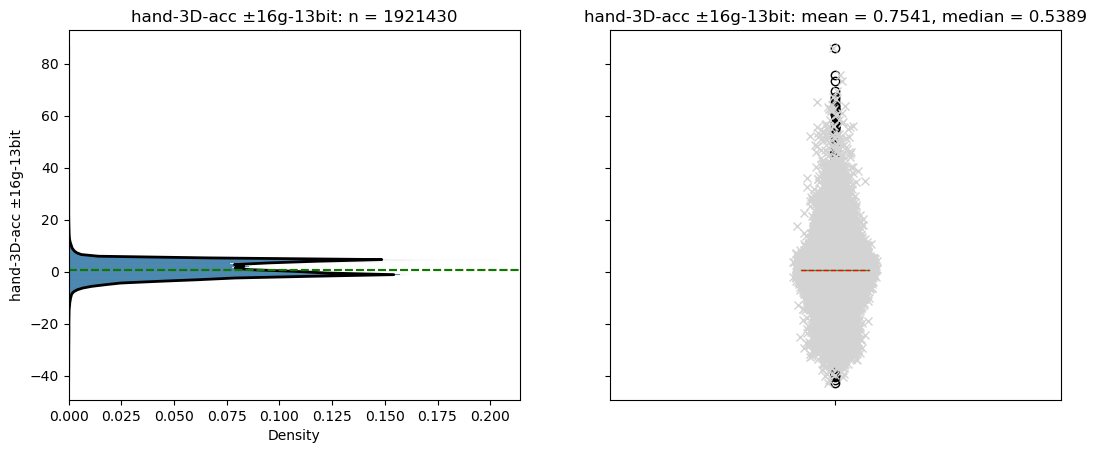

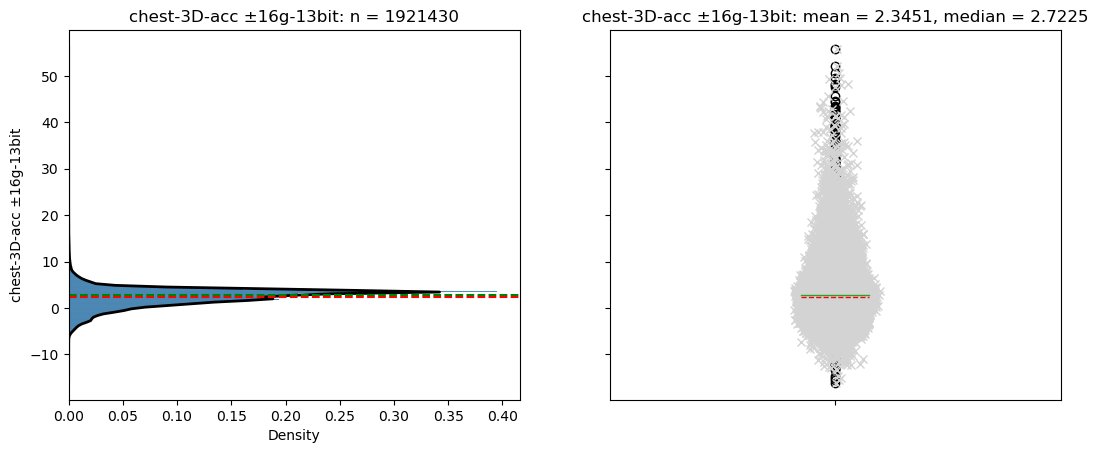

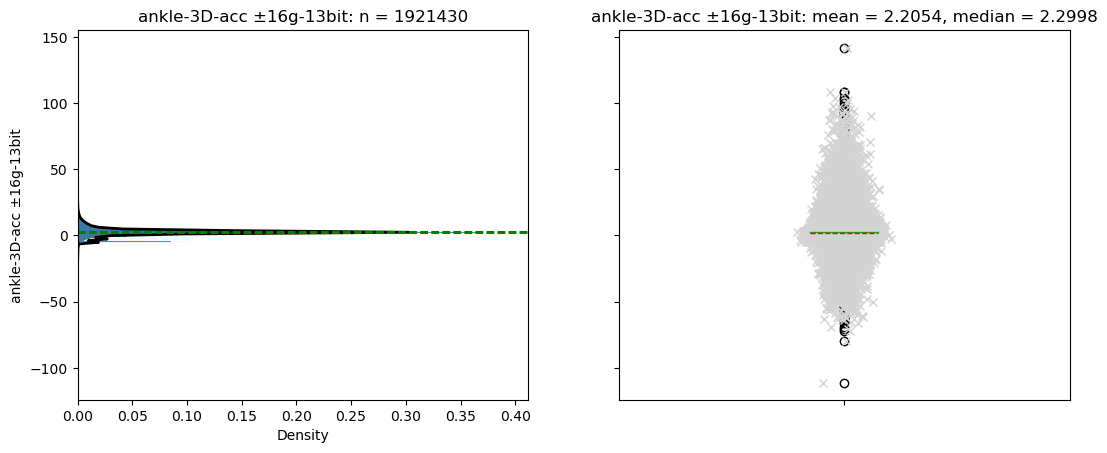

In [33]:
for col in ['hand-3D-acc ±16g-13bit', 'chest-3D-acc ±16g-13bit', 'ankle-3D-acc ±16g-13bit']:
    # Plot histograms and box plots for each accelerometer column against timestamp
    box_hist_plot(new_df, col)

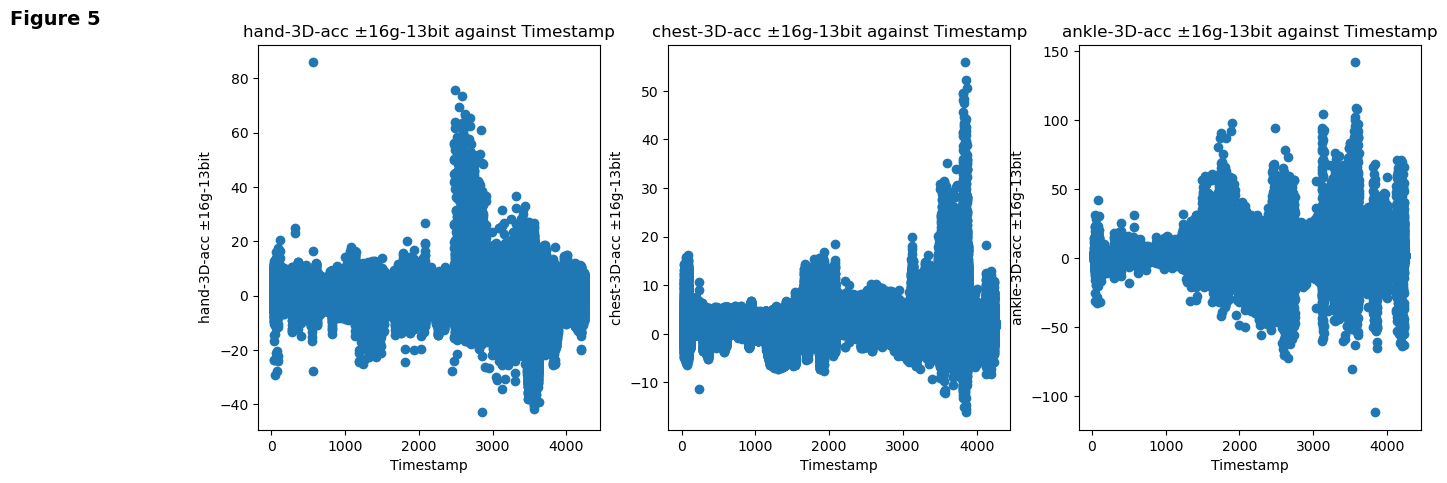

In [34]:
features=['hand-3D-acc ±16g-13bit', 'chest-3D-acc ±16g-13bit', 'ankle-3D-acc ±16g-13bit']
fig, axes = plt.subplots(1, len(features), figsize=(15, 5))

for i, feature in enumerate(['hand-3D-acc ±16g-13bit', 'chest-3D-acc ±16g-13bit', 'ankle-3D-acc ±16g-13bit']):
    axes[i].scatter(new_df['timestamp'], new_df[feature])
    axes[i].set_title(f'{feature} against Timestamp')
    axes[i].set_xlabel('Timestamp')
    axes[i].set_ylabel(feature)
plt.text(0.02, 0.95, 'Figure 5', transform=plt.gcf().transFigure, fontsize=14, fontweight='bold',ha='right', va='top')
#plt.tight_layout()
plt.show()

In [35]:
#plt.text(0.02, 0.95, 'Figure 4', transform=plt.gcf().transFigure, fontsize=14, fontweight='bold',ha='right', va='top')


In [36]:
#for subject_id in new_df['Subject_ID'].unique():
 #   subject_df = new_df[new_df['Subject_ID'] == subject_id]

    # Plot histograms and box plots for the specified features
  #  for col in ['hand-3D-acc ±16g-13bit', 'chest-3D-acc ±16g-13bit', 'ankle-3D-acc ±16g-13bit']:
   #     box_hist_plot(subject_df, col, title=f" Subject_ID: {subject_id}")

#### Gyroscope

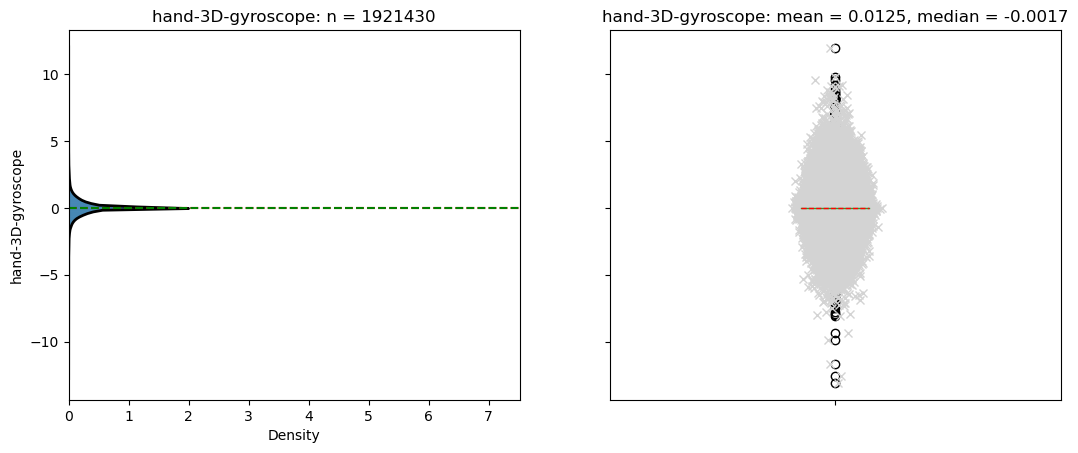

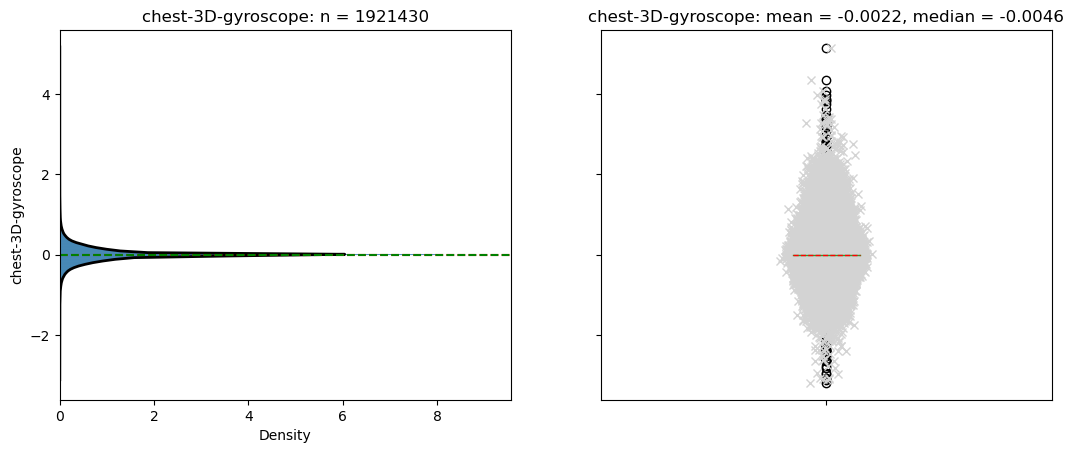

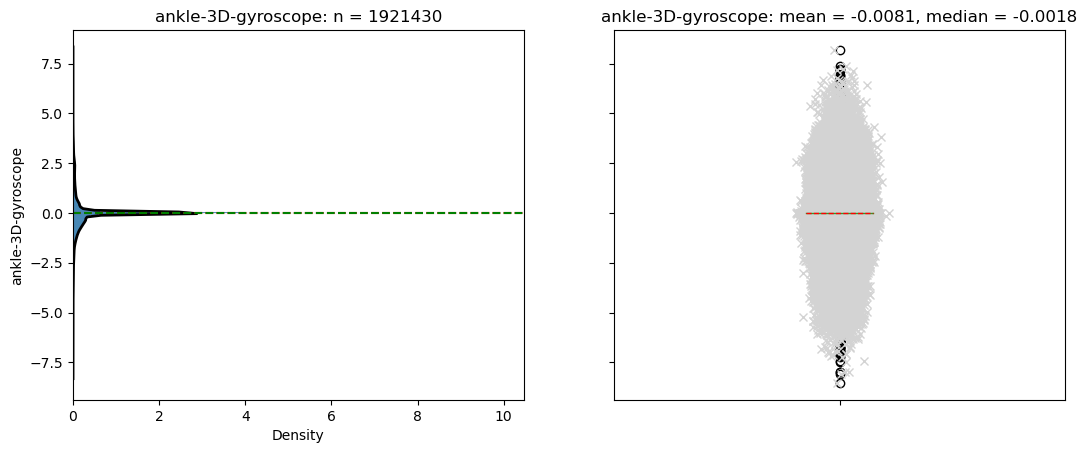

In [37]:
for col in ['hand-3D-gyroscope', 'chest-3D-gyroscope', 'ankle-3D-gyroscope']:
    # Plot histograms and box plots for each accelerometer column against timestamp
    box_hist_plot(new_df, col)

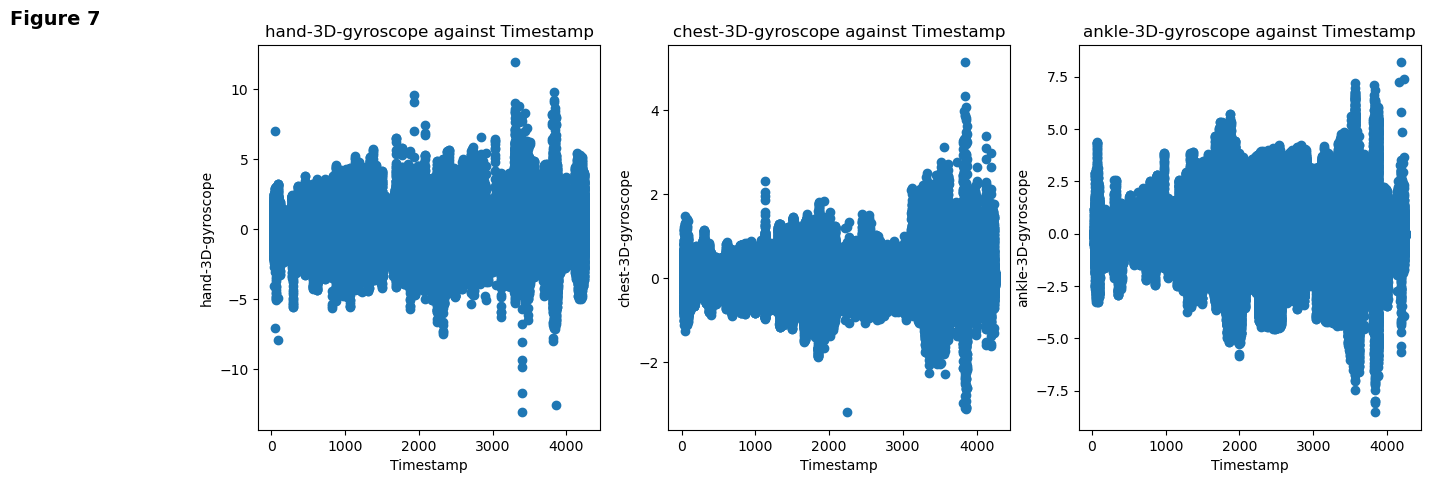

In [38]:
fig, axes = plt.subplots(1, len(features), figsize=(15, 5))

for i, feature in enumerate(['hand-3D-gyroscope', 'chest-3D-gyroscope', 'ankle-3D-gyroscope']):
    axes[i].scatter(new_df['timestamp'], new_df[feature])
    axes[i].set_title(f'{feature} against Timestamp')
    axes[i].set_xlabel('Timestamp')
    axes[i].set_ylabel(feature)
plt.text(0.02, 0.95, 'Figure 7', transform=plt.gcf().transFigure, fontsize=14, fontweight='bold',ha='right', va='top')
#plt.tight_layout()
plt.show()

In [39]:
#for subject_id in new_df['Subject_ID'].unique():
 #   subject_df = new_df[new_df['Subject_ID'] == subject_id]

    # Plot histograms and box plots for the specified features
  #  for col in ['hand-3D-gyroscope', 'chest-3D-gyroscope', 'ankle-3D-gyroscope']:
   #     box_hist_plot(subject_df, col, title=f" Subject_ID: {subject_id}")

#### Magnenometer

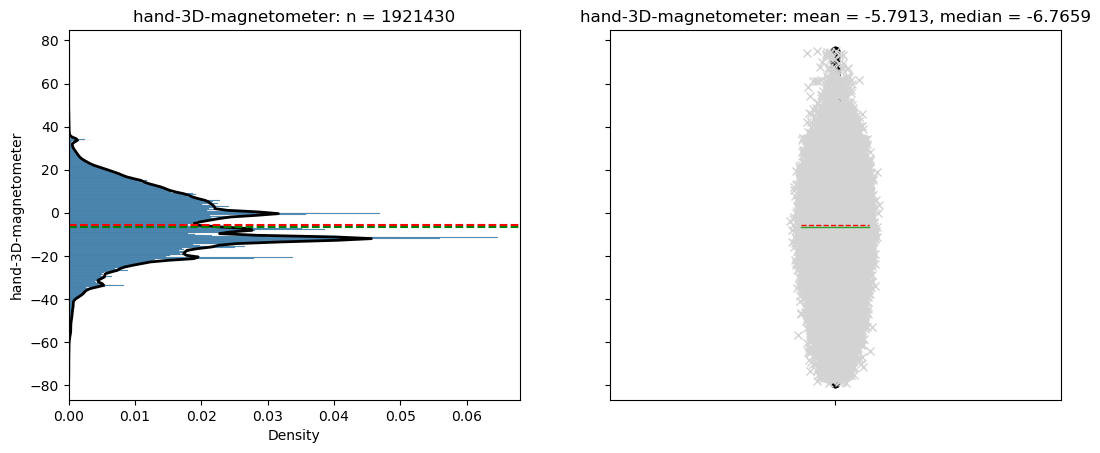

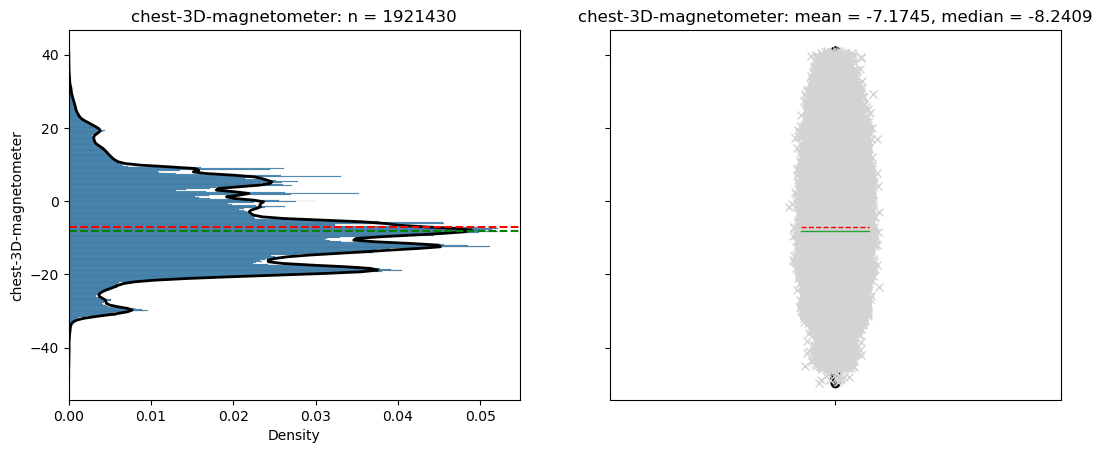

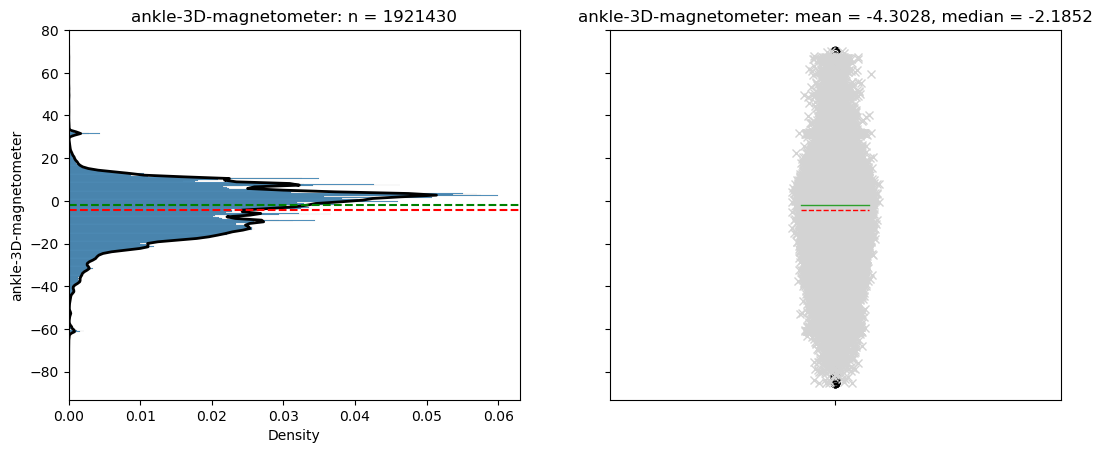

In [40]:
for col in ['hand-3D-magnetometer', 'chest-3D-magnetometer', 'ankle-3D-magnetometer']:
    # Plot histograms and box plots for each accelerometer column against timestamp
    box_hist_plot(new_df, col)

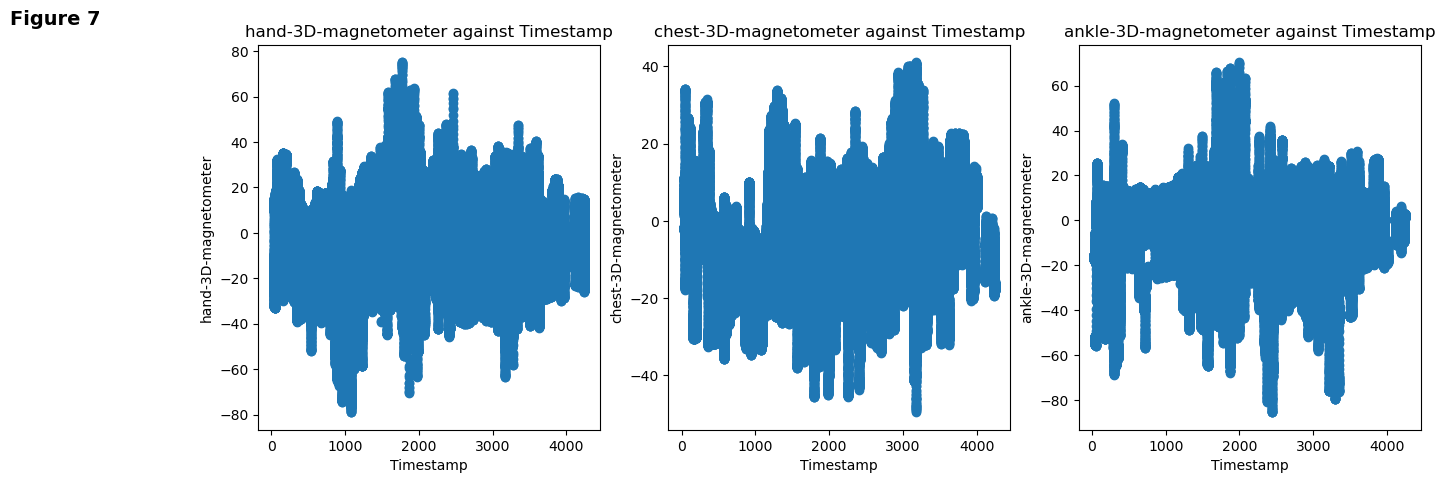

In [41]:
fig, axes = plt.subplots(1, len(features), figsize=(15, 5))

for i, feature in enumerate(['hand-3D-magnetometer', 'chest-3D-magnetometer', 'ankle-3D-magnetometer']):
    axes[i].scatter(new_df['timestamp'], new_df[feature])
    axes[i].set_title(f'{feature} against Timestamp')
    axes[i].set_xlabel('Timestamp')
    axes[i].set_ylabel(feature)
plt.text(0.02, 0.95, 'Figure 7', transform=plt.gcf().transFigure, fontsize=14, fontweight='bold',ha='right', va='top')
#plt.tight_layout()
plt.show()

In [42]:
#for subject_id in new_df['Subject_ID'].unique():
 #   subject_df = new_df[new_df['Subject_ID'] == subject_id]

    # Plot histograms and box plots for the specified features
  #  for col in ['hand-3D-magnetometer', 'chest-3D-magnetometer', 'ankle-3D-magnetometer']:
   #     box_hist_plot(subject_df, col, title=f" Subject_ID: {subject_id}")

#### MET

Text(0.5, 1.0, 'MET')

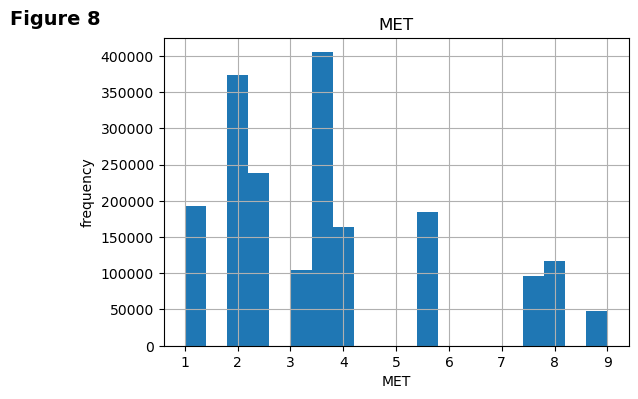

In [43]:
plt.figure(figsize=(6,4))
new_df['MET'].hist(bins=20)
#dat0.price.plot(kind="hist",color='lightblue')
plt.xlabel("MET")
plt.ylabel("frequency")
plt.text(0.02, 0.95, 'Figure 8', transform=plt.gcf().transFigure, fontsize=14, fontweight='bold',ha='right', va='top')

plt.title('MET')

In [44]:
#for subject_id in new_df['Subject_ID'].unique():
 #   subject_df = new_df[new_df['Subject_ID'] == subject_id]

    # Plot histograms and box plots for the specified features
  #  for col in ['hand-temp', 'chest-temp', 'ankle-temp']:
#        box_hist_plot(subject_df, col, title=f" Subject_ID: {subject_id}")

#### Temperature

C:\Users\QS60\AppData\Local\Temp\ipykernel_35744\2030580511.py:10: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


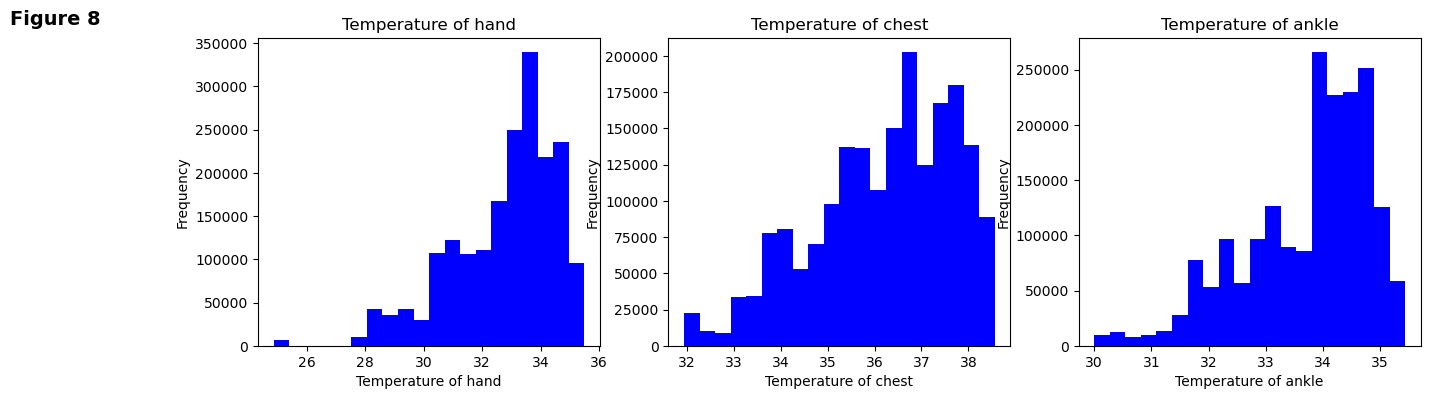

In [45]:
fig, axes = plt.subplots(1, len(features), figsize=(15, 4))

for i, column in enumerate(['hand-temp', 'chest-temp', 'ankle-temp']):
    axes[i].hist(new_df[column], bins=20, color='blue')
    axes[i].set_xlabel(f'Temperature of {column.split("-")[0]}')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Temperature of {column.split("-")[0]}')

plt.text(0.02, 0.95, 'Figure 8', transform=plt.gcf().transFigure, fontsize=14, fontweight='bold',ha='right', va='top')
plt.tight_layout()
plt.show()

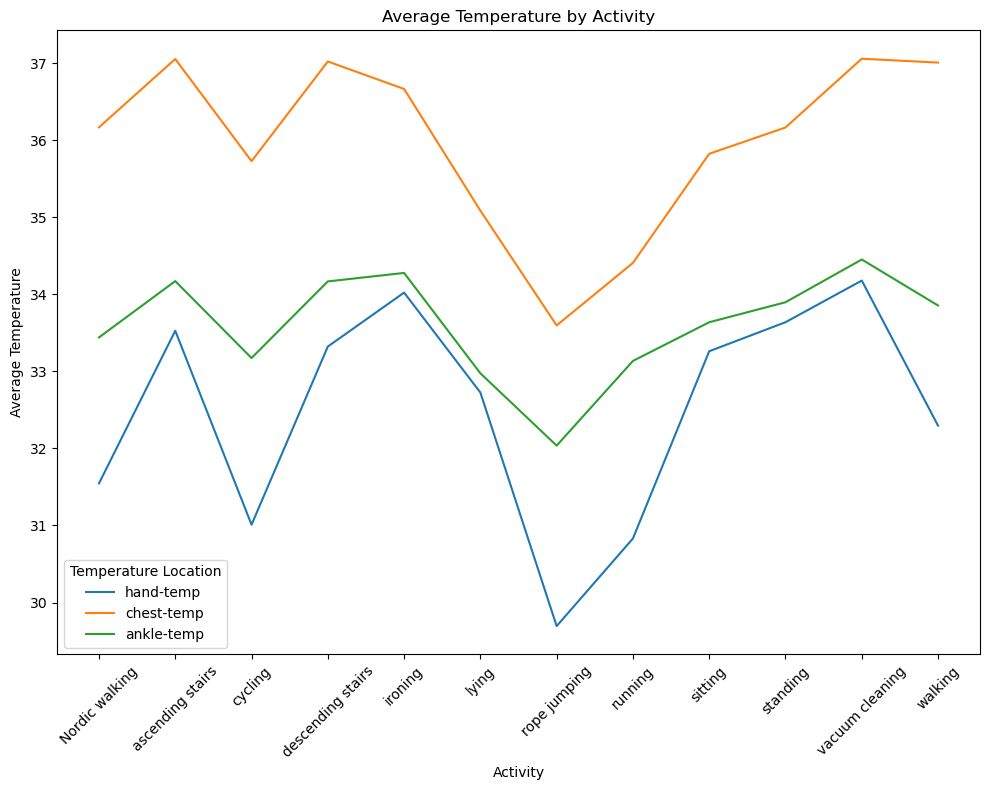

In [46]:
grouped_data = new_df.groupby('activity').agg({
    'hand-temp': 'mean',
    'chest-temp': 'mean',
    'ankle-temp': 'mean'
}).reset_index()

# Convert the data to a format suitable for line plotting
grouped_data_melted = grouped_data.melt(id_vars='activity', 
                                        value_vars=['hand-temp', 'chest-temp', 'ankle-temp'], 
                                        var_name='Temperature Location', value_name='Average Temperature')

# Plot the average temperatures for hand, chest, and ankle by activity
plt.figure(figsize=(10, 8))
sns.lineplot(data=grouped_data_melted, x='activity', y='Average Temperature', hue='Temperature Location')

# Customize the plot with titles and labels
plt.title('Average Temperature by Activity')
plt.xlabel('Activity')
plt.ylabel('Average Temperature')
plt.xticks(rotation=45)
plt.legend(title='Temperature Location')
plt.tight_layout()
plt.show()

From the boxplot, the data is so large that its's covering the boxplot. I can't say much about that because of how the data is. For the histplot of acceleration we can see that the hand,chest and ankle has a peak at 0, which means the distribution falls around 0 and it doesnt have a normal distribution. The ankle reading for the 6g acceleration had little or no readings. 
The scattered plot for acceleration also shows how the distributio increased at each timestamp. For the hand acceleration, it shows at timestamp 3000, it reduced and then became normal, for the chest acceleration it also shows it reduced and also incresead, then for the ankle it shows a peak at 4000 timestamp.

The gyroscope also has its peak at 0 and because of how the reading is, ill say the gryroscope wasnt as effective as the acceleration.
The gyroscope also showed its distribution in the scattered plot but the chest-gyroscope has a more dispersed distribution

The Magnenometer has a kind of guassian distribution for the hand and chest with different pick, I will say this was more distributed than the other instrument but it's not guassian. Compared to acceleration and the gyroscope, I will say this has a more effective distribution. The ankle magnenometer did slightly better than the other instrument.
Magnenometer also had a dispersed distribution for the hand,chest and ankle.

The MET had its increase at 3.5 and 2, this could be due to the activities that was done the most.

The Temperature hang was gotten between 28°C-35°C, Chest temperature was gotten between 32°C - 38°C, then ankle tmperature was gotten between 30°C-35°C

The line graph shows how each temperature increased or decreased due to activities that was done.


### Activities Count

In [47]:
 (new_df['activity'].value_counts())

ironing              237902
walking              229709
lying                192290
standing             188984
sitting              184645
Nordic walking       184444
vacuum cleaning      174976
cycling              163302
ascending stairs     117094
descending stairs    104865
running               95641
rope jumping          47578
Name: activity, dtype: int64

### Correlation Heatmap

Negligible correlation: heart-rate bpm and Subject_ID
High correlation: heart-rate bpm and timestamp
High correlation: heart-rate bpm and MET
Low correlation: heart-rate bpm and activityID
Very high correlation: heart-rate bpm and heart-rate bpm
Low correlation: heart-rate bpm and hand-temp
Negligible correlation: heart-rate bpm and chest-temp
Negligible correlation: heart-rate bpm and ankle-temp
Negligible correlation: heart-rate bpm and hand-3D-acc ±16g-13bit
Low correlation: heart-rate bpm and chest-3D-acc ±16g-13bit
Low correlation: heart-rate bpm and ankle-3D-acc ±16g-13bit
Negligible correlation: heart-rate bpm and hand-3D-gyroscope
Negligible correlation: heart-rate bpm and chest-3D-gyroscope
Negligible correlation: heart-rate bpm and ankle-3D-gyroscope
Negligible correlation: heart-rate bpm and hand-3D-magnetometer
Negligible correlation: heart-rate bpm and chest-3D-magnetometer


<Axes: >

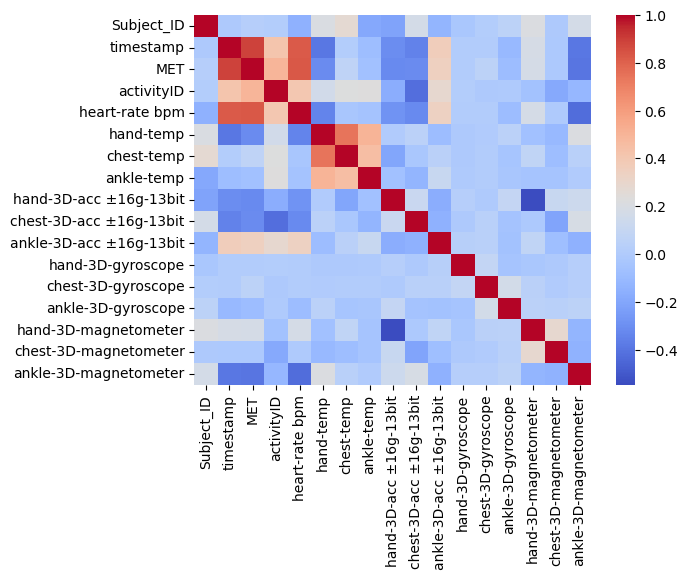

In [48]:
numeric_df = new_df.select_dtypes(include=['float64', 'int64'])  # Adjust as per your numeric data types


corr = numeric_df.corr(method="spearman")
cols = numeric_df.columns
col1 = "heart-rate bpm"
for col2 in cols[:-1]:
    correlation = corr[col1][col2]
    if np.abs(correlation) < 0.3:
        print(f"Negligible correlation: {col1} and {col2}")
    if 0.3 <= np.abs(correlation) < 0.5:
        print(f"Low correlation: {col1} and {col2}")
    if 0.5 <= np.abs(correlation) < 0.7:
        print(f"Moderate correlation: {col1} and {col2}")
    if 0.7 <= np.abs(correlation) < 0.9:
        print(f"High correlation: {col1} and {col2}")
    if 0.9 <= np.abs(correlation):
        print(f"Very high correlation: {col1} and {col2}")

sns.heatmap(data=corr, cmap="coolwarm")

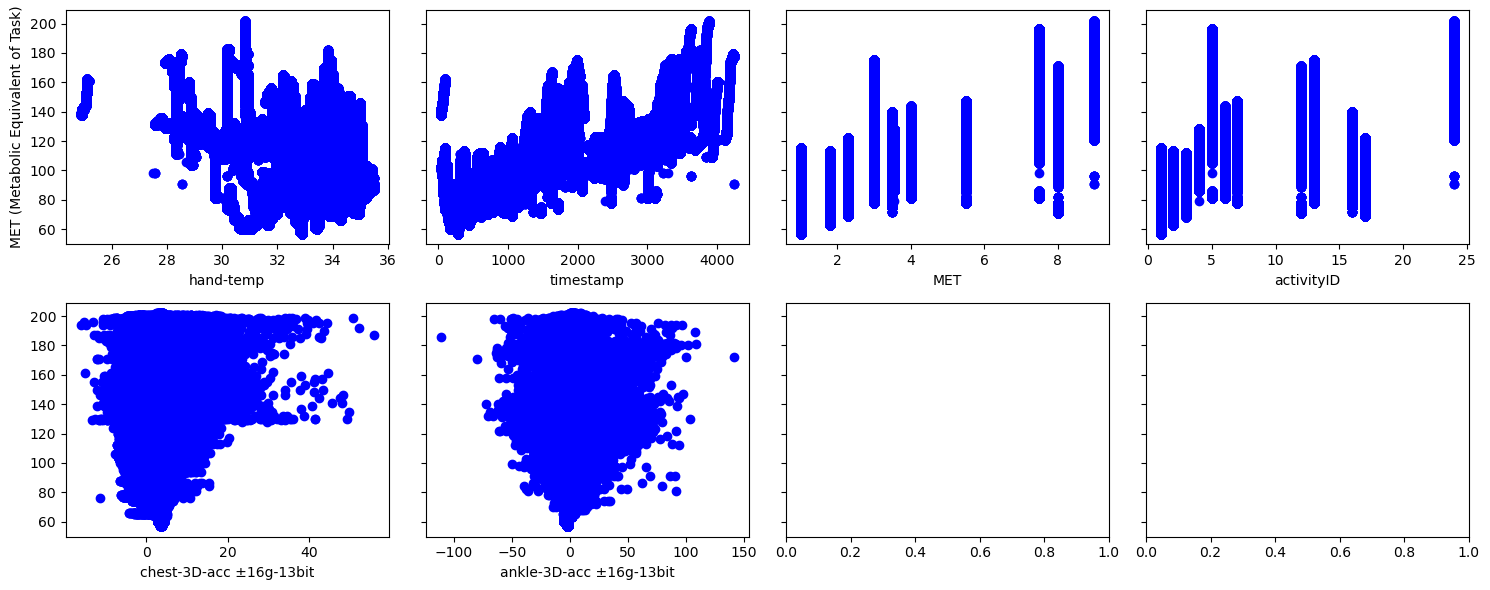

In [49]:
feature_columns = ['hand-temp', 'timestamp', 'MET', 'activityID', 'chest-3D-acc ±16g-13bit', 'ankle-3D-acc ±16g-13bit']
met_column = 'heart-rate bpm'

num_features = len(feature_columns)

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 6), sharey=True)
axes = axes.flatten()  # Flatten the 2D array to 1D for easy indexing

# Iterate through each feature and create a scatter plot
for i, feature in enumerate(feature_columns):
    axes[i].scatter(new_df[feature], new_df[met_column], color='blue', marker='o')
    axes[i].set_xlabel(feature)
#    axes[i].grid(True)

axes[0].set_ylabel('MET (Metabolic Equivalent of Task)')

plt.tight_layout()
plt.show()

There was a high correlation between heart rate and MET, Heart rate had a low correlation with activityID this could be because there is no relationsip betwen the activityID and heart rate. There was a high correlation between heartrate and timestamp, this could be as the timestamp increased so also the heart rate was increasind due to each activity that was being done every second. There was also a low correlation betweein heart rate and hand temp, meaning there could have being a relationsip. Probably as the heart rate was icreasing or reducing, there was an effect on the heart temperature either it was increasing or reducing. Low correlation between heart rate and chest acceleration this could be that the heart rate had an effect on the instrument also a low correlation on ankle acceleration this could be that the was an effect on theis instrument on the chest and ankle. This could proof that this instrument correlated with rate, so the heartrate had an effect on  this instrument

Negligible correlation: MET and Subject_ID
High correlation: MET and timestamp
Very high correlation: MET and MET
Low correlation: MET and activityID
High correlation: MET and heart-rate bpm
Low correlation: MET and hand-temp
Negligible correlation: MET and chest-temp
Negligible correlation: MET and ankle-temp
Low correlation: MET and hand-3D-acc ±16g-13bit
Low correlation: MET and chest-3D-acc ±16g-13bit
Low correlation: MET and ankle-3D-acc ±16g-13bit
Negligible correlation: MET and hand-3D-gyroscope
Negligible correlation: MET and chest-3D-gyroscope
Negligible correlation: MET and ankle-3D-gyroscope
Negligible correlation: MET and hand-3D-magnetometer
Negligible correlation: MET and chest-3D-magnetometer


<Axes: >

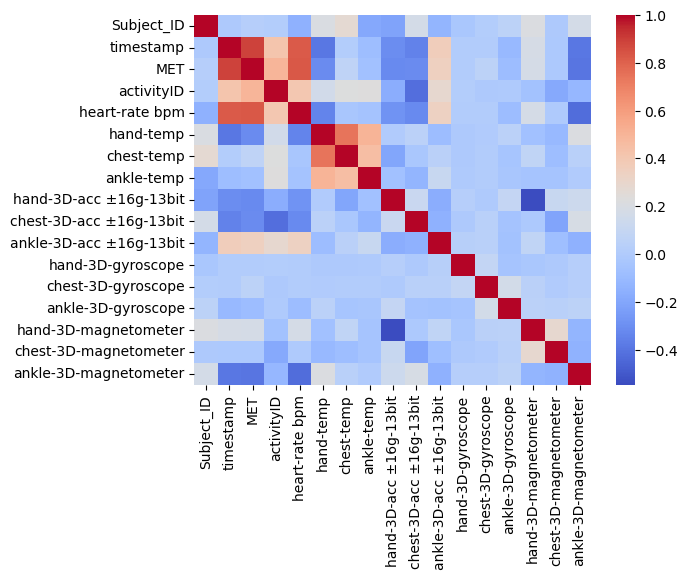

In [50]:
numeric_df = new_df.select_dtypes(include=['float64', 'int64'])  # Adjust as per your numeric data types


corr = numeric_df.corr(method="spearman")
cols = numeric_df.columns
col1 = "MET"
for col2 in cols[:-1]:
    correlation = corr[col1][col2]
    if np.abs(correlation) < 0.3:
        print(f"Negligible correlation: {col1} and {col2}")
    if 0.3 <= np.abs(correlation) < 0.5:
        print(f"Low correlation: {col1} and {col2}")
    if 0.5 <= np.abs(correlation) < 0.7:
        print(f"Moderate correlation: {col1} and {col2}")
    if 0.7 <= np.abs(correlation) < 0.9:
        print(f"High correlation: {col1} and {col2}")
    if 0.9 <= np.abs(correlation):
        print(f"Very high correlation: {col1} and {col2}")

sns.heatmap(data=corr, cmap="coolwarm")

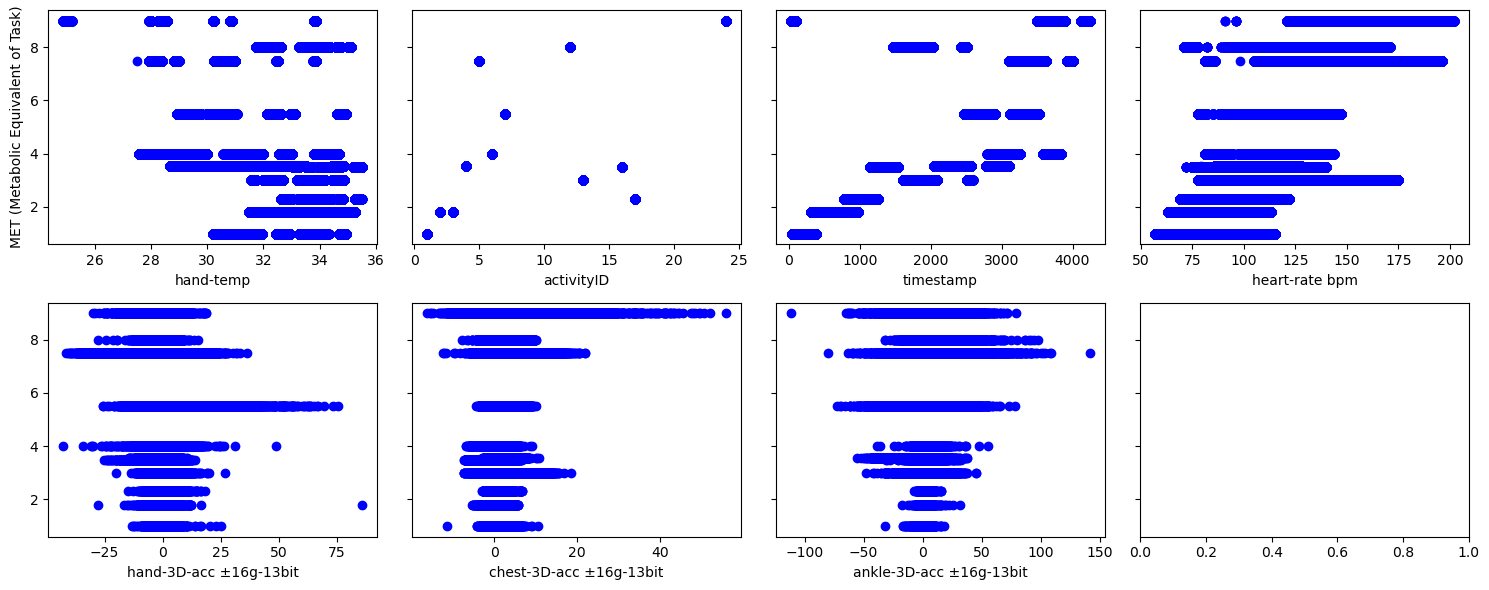

In [51]:
feature_columns = ['hand-temp', 'activityID', 'timestamp', 'heart-rate bpm', 'hand-3D-acc ±16g-13bit', 'chest-3D-acc ±16g-13bit', 'ankle-3D-acc ±16g-13bit']
met_column = 'MET'

num_features = len(feature_columns)

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 6), sharey=True)
axes = axes.flatten()  # Flatten the 2D array to 1D for easy indexing

# Iterate through each feature and create a scatter plot
for i, feature in enumerate(feature_columns):
    axes[i].scatter(new_df[feature], new_df[met_column], color='blue', marker='o')
    axes[i].set_xlabel(feature)
#    axes[i].grid(True)

axes[0].set_ylabel('MET (Metabolic Equivalent of Task)')

plt.tight_layout()
plt.show()

I also saw how the MET corroletate with some of the features, MET know as metabolic equivalent of task this was done from each of the activity and the MET reading was gotten from the data info. MET had a hig correlation with timstamp, this means that the timestamp had an impact on MET. This could be due to the activity that was carried out through the time the impact was either increased or decreased. MET had a low correlation with activityID, high correlation with MET and heart rate, meaning the activity that was performed caused the heart rate to either increase or reduce. Low correlation with hand temp meaning there was an effect of MET on the hand temperature which might have caused an increasein temperature or a decrease in the temperature. Low correleation with hand, chest and ankle acceleration which could mean it had an effect on the acceleration and had a negligible correlation on te other instruments

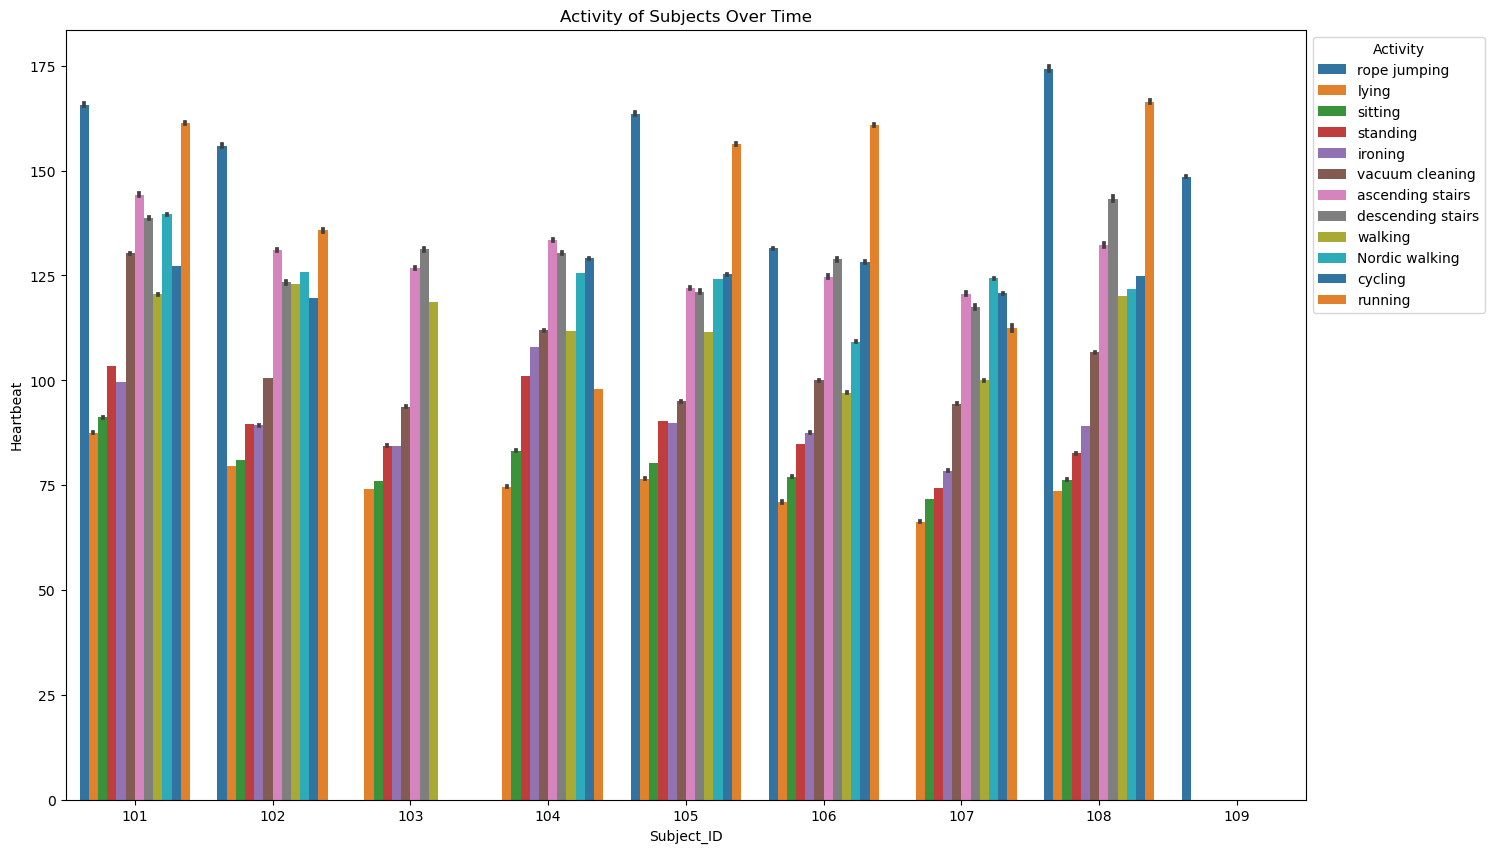

In [52]:
# Filter the DataFrame based on the condition
subset_df = df_cleaned[df_cleaned['Subject_ID'].isin(['101', '102', '103', '104', '105', '106', '107', '108', '109'])]

# Set the order of subjects for better plotting
subject_order = ['101', '102', '103', '104', '105', '106', '107', '108', '109']
activity_order=['rope jumping', 'lying', 'sitting', 'standing', 'ironing','vacuum cleaning', 'ascending stairs', 'descending stairs','walking', 'Nordic walking', 'cycling', 'running']
pastel_palette = sns.color_palette()

# Plotting
plt.figure(figsize=(16, 10))
sns.barplot(x='Subject_ID', y='heart-rate bpm', hue='activity', data=subset_df, hue_order=activity_order,palette=pastel_palette)
plt.xlabel('Subject_ID')
plt.ylabel('Heartbeat')
plt.title('Activity of Subjects Over Time')
plt.legend(title='Activity', bbox_to_anchor=(1, 1))
plt.show()

In [53]:
feature_data=['Subject_ID', 'timestamp', 'MET', 'activityID', 'activity',
       'heart-rate bpm', 'hand-temp', 'hand-3D-acc ±16g-13bit',
       'hand-3D-gyroscope', 'hand-3D-magnetometer', 'chest-temp',
       'chest-3D-acc ±16g-13bit', 'chest-3D-gyroscope',
       'chest-3D-magnetometer', 'ankle-temp', 'ankle-3D-acc ±16g-13bit',
       'ankle-3D-gyroscope', 'ankle-3D-magnetometer']

In [54]:
feature_names=['Subject_ID', 'timestamp', 'activityID', 'heart-rate bpm',
       'hand-temp', 'hand-3D-acc ±16g-13bit', 'hand-3D-gyroscope',
       'hand-3D-magnetometer', 'chest-temp', 'chest-3D-acc ±16g-13bit',
       'chest-3D-gyroscope', 'chest-3D-magnetometer', 'ankle-temp',
       'ankle-3D-acc ±16g-13bit', 'ankle-3D-gyroscope',
       'ankle-3D-magnetometer', 'activity_ascending stairs',
       'activity_cycling', 'activity_descending stairs', 'activity_ironing',
       'activity_lying', 'activity_rope jumping', 'activity_running',
       'activity_sitting', 'activity_standing', 'activity_vacuum cleaning',
       'activity_walking']

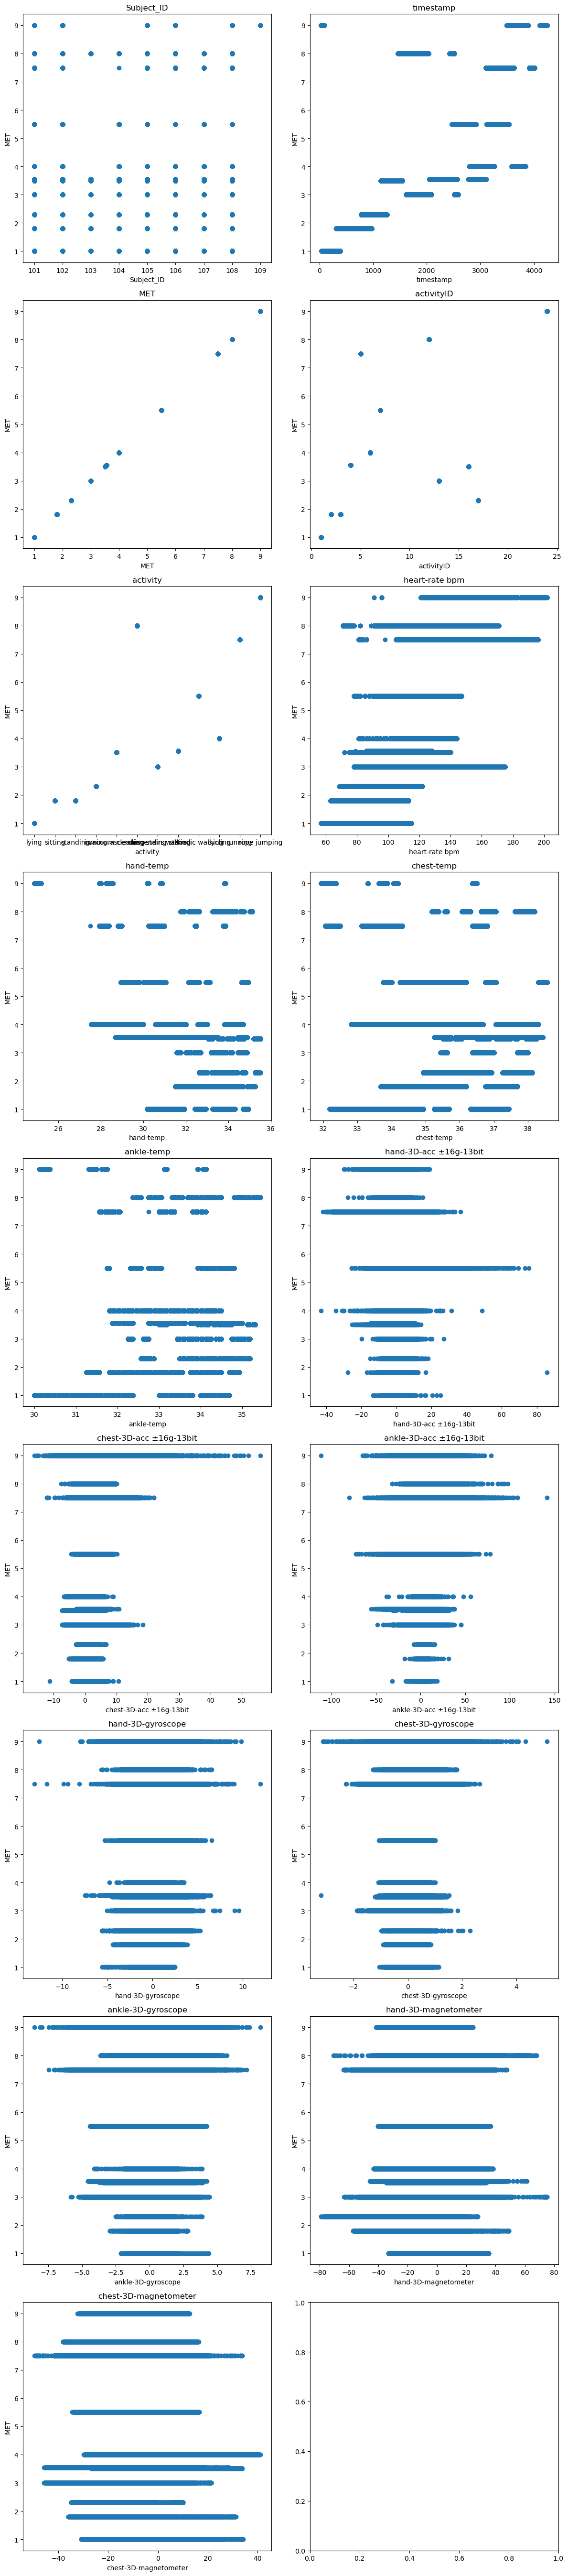

In [55]:
num_cols = len(feature_data)
num_rows = (num_cols + 1) // 2  
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 6*num_rows))
axes = axes.flatten()

for idx, label in enumerate(new_df.columns[:-1]):
    axes[idx].scatter(new_df[label], new_df['MET'])
    axes[idx].set_title(label)
    axes[idx].set_ylabel('MET')
    axes[idx].set_xlabel(label)
plt.tight_layout()

plt.show()

The barplot shows subjectID and the activities the perfomed. Rope jumping was the most performed activity followed by lying/ SubjectID 109 performed only rope jumping out of the 12 activities that where performed. Subject 101, 105, 106, and 108 performed the most activites. I can say they where more active than the rest Subjects., From the scattered we could see how the features increased with MET. AS the MET increased we could see how the features did. Timestamp increaded at MET 9 which got up to 4000 timestamp.  

### PCA

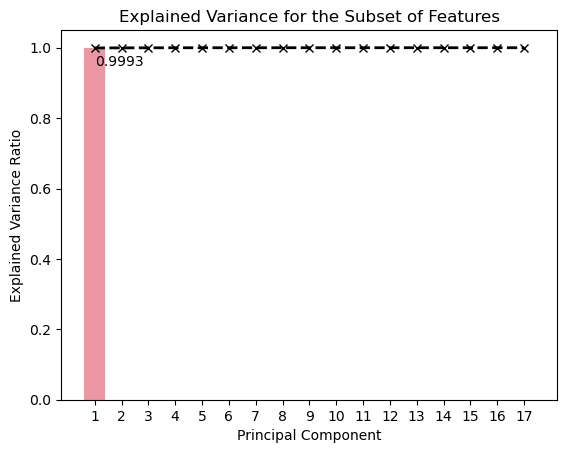

In [56]:
from sklearn.decomposition import PCA

selected_features = ['Subject_ID', 'timestamp', 'MET', 'activityID', 'heart-rate bpm', 'hand-temp',
            'chest-temp', 'ankle-temp', 'hand-3D-acc ±16g-13bit',
            'chest-3D-acc ±16g-13bit', 'ankle-3D-acc ±16g-13bit',
            'hand-3D-gyroscope', 'chest-3D-gyroscope', 'ankle-3D-gyroscope',
            'hand-3D-magnetometer', 'chest-3D-magnetometer', 'ankle-3D-magnetometer'] 
subset_df = new_df[selected_features]

# Perform PCA on the subset of features
pca = PCA().fit(subset_df)
comps = pca.components_
ev_ratio = pca.explained_variance_ratio_
cumul_ev_ratio = np.cumsum(ev_ratio)
pcs = np.arange(1, len(selected_features) + 1)
loadings = pd.DataFrame(data=comps, columns=[f"PC{pc}" for pc in pcs], index=selected_features)

# Plot the explained variance and cumulative explained variance
fig, ax = plt.subplots(nrows=1, ncols=1)
sns.barplot(x=pcs, y=ev_ratio)
ax.plot(pcs - 1, cumul_ev_ratio, ls="--", marker="x", lw=2, c="k")

for pc, cer in zip(pcs, cumul_ev_ratio):
    ax.annotate(f"{cer:.4f}", xy=(pc - 1, cer - 0.05))
    if cer > 0.98:
        break

ax.set_xlabel("Principal Component")
ax.set_ylabel("Explained Variance Ratio")
ax.set_title("Explained Variance for the Subset of Features")

plt.show()

In [57]:
elbow = 2
components = [f"PC{i}" for i in range(1,elbow+1)]
loadings[components]

,PC1,PC2
Subject_ID,-0.000045,0.999802
timestamp,-0.024663,-0.019798
MET,-0.030014,0.000879
activityID,0.051052,-0.000100
heart-rate bpm,0.008189,0.000122
hand-temp,0.031493,0.000821
chest-temp,-0.083574,-0.000838
ankle-temp,-0.217289,0.000520
hand-3D-acc ±16g-13bit,0.806257,-0.000063
chest-3D-acc ±16g-13bit,0.234627,-0.000644


Principle component analysis for subjectID has a significance according to pc2 but had negligible impact in pc1, timestamp haas a negative impace both in pc1 and pc2 meaning it doesnt play any significant row to PCA. Timestamp has a small positive on pc2 relative to PCA. Heart-rate BPM positively contributes to PC1 but has a negligible significance to PC2.  MET has a low positive significance to pc2. Hand temperature  has a positive contribution to both pc1 and pc2, with pc1 having a small contribution. CHest temprature has a negative contribution  to pc1 and pc2, but a larger negative value on pc1. 

### Linear Regression

In [58]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [59]:
import copy

In [60]:
def data_xy(dataframe,y_label,x_labels=None):
    dataframe= copy.deepcopy(dataframe)
    if not x_labels is None:
        x=dataframe[[c for c in dataframe.columns if c!=y_label]].values
    else:
        if len(x_labels)==1:
            x=dataframe[x_labels[0]].values.reshape(-1,1)
        else:
            x= dataframe[y_label].values
            
    y=dataframe[y_label].values.reshape(-1,1)
    data=np.hstack((x,y))
    
    return data,x,y

In [61]:
train,test = np.split(norm_df.sample(frac=1),[int(0.8*len(new_df))])

In [62]:
_,x_train,y_train= data_xy(train,'MET',x_labels= norm_df)
_,x_test,y_test= data_xy(test,'MET',x_labels=norm_df)

In [63]:
_, x_train, y_train = data_xy(train, 'MET', x_labels=norm_df.columns.difference(['MET']))
_, x_test, y_test = data_xy(test, 'MET', x_labels=norm_df.columns.difference(['MET']))


In [64]:
model= LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [65]:
print(model.coef_)

[[ 2.05898221e-15 -7.20773101e-19  1.13402889e-01 -1.05358221e-16
  -2.41930088e-16 -2.91007194e-15  7.70523166e-16  3.35336509e-16
  -1.47247271e-15  3.93200065e-16 -1.03555966e-16 -1.43780786e-14
  -4.68613052e-15 -2.56120163e-16  1.68375510e-16  1.63105588e-16
   1.93298555e+00 -1.38659711e+00 -3.18041734e+00 -4.33402889e+00
  -3.81958266e+00  1.57215088e+00  2.22680578e+00 -3.13298555e+00
  -3.24638844e+00 -3.02062600e+00 -1.60979133e+00]]


In [66]:
intercept = model.intercept_[0]

coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': model.coef_[0]})

print(f"Intercept: {intercept}")
(coefficients_df)


Intercept: 4.706179775280797


,Feature,Coefficient
0,Subject_ID,2.058982e-15
1,timestamp,-7.207731e-19
2,activityID,1.134029e-01
3,heart-rate bpm,-1.053582e-16
4,hand-temp,-2.419301e-16
5,hand-3D-acc ±16g-13bit,-2.910072e-15
6,hand-3D-gyroscope,7.705232e-16
7,hand-3D-magnetometer,3.353365e-16
8,chest-temp,-1.472473e-15
9,chest-3D-acc ±16g-13bit,3.932001e-16


In [67]:
score= model.score(x_test,y_test)
print(f"The mean accuracy of the predictions made by the model on the test dataset is {score:.2f}.")

The mean accuracy of the predictions made by the model on the test dataset is 1.00.


In [68]:
x_train


array([[1.02000e+02, 5.63110e+02, 2.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.03000e+02, 3.82820e+02, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.03000e+02, 2.32581e+03, 4.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       ...,
       [1.02000e+02, 6.38030e+02, 3.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.05000e+02, 1.80028e+03, 1.30000e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.02000e+02, 2.96909e+03, 4.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00]])

In [69]:
predictions = model.predict(x_test)

mse = mean_squared_error(y_test, predictions)
#print(predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.7842516310607669e-28


The coefficient was gotten from the linear regression model, using the coef_. The coeeficient tells the direction wether postive or negative and the strength of each feature with target variable which is the 'MET'. From the model the features that are positive are shown. Excluding studentid,activityid and timestample which are not the dependable variables we are looking at. Heart rate had a positive which indicates an effect on the predicted Met value so also hand-temp has a positive coefficient hand-3D-acc ±16g-13bit had a positive coefficient. chest-3D-gyroscope also has a positive coeeficient which means the target variable increased by the figure 8.538932e-04, chest-3D-magnetometer also has a positive coeeficient, ankle temp has a positive coeeficient, ankle-3D-acc ±16g-13bit has a positive coefficient, ankle-3D-magnetometer has a positive coeeficient. Some activities also had positive coefficient this could be due to activities that require a lot of energy to perform the task. Activities like ascending stairs, rope jumping, running had positive coefficient. so we can base our model on this features.

The accuracy of the linear regression is about 100% which means its predictions where all correct using all the features. I had to do this with statsmodel because this couykld have been overfitted.

### Feature Selection

In [70]:
y = new_df["activityID"]
X = new_df.copy(deep=True)
X.drop(columns=["activityID","activity"],inplace=True)

In [71]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

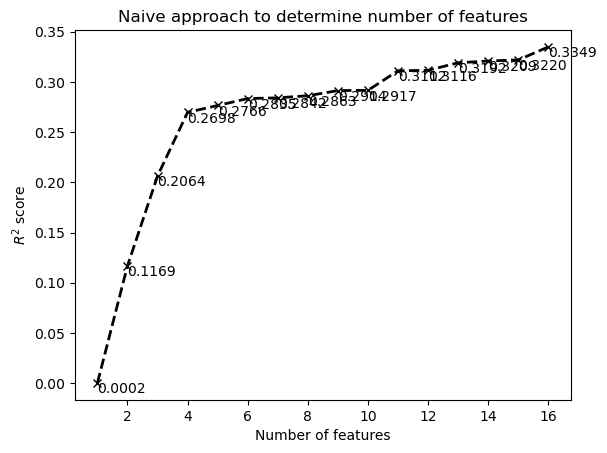

In [72]:
lm = LinearRegression()
score = np.zeros(len(X.columns))
num_features = np.arange(1,len(X.columns)+1)
for idx, nf in enumerate(num_features):
    rfe = RFE(lm,n_features_to_select=nf).fit(X,y)
    score[idx] = rfe.score(X,y)
    
fig, ax = plt.subplots(nrows=1,ncols=1)
ax.plot(num_features,score,ls="--",lw=2,marker="x",c="k")
ax.set_xlabel("Number of features")
ax.set_ylabel(r"$R^2$ score")
ax.set_title("Naive approach to determine number of features")
for idx, s in zip(num_features,score):
    ax.annotate(f"{s:.4f}",xy=[idx,s-0.01])

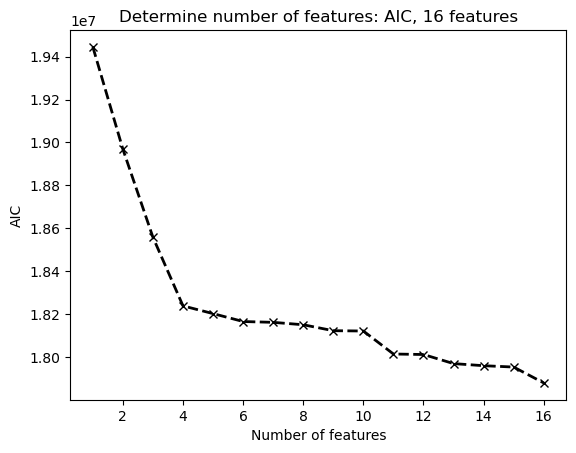

In [73]:
from sklearn.metrics import mean_squared_error

AIC = np.zeros(len(X.columns))
lm = LinearRegression()
for idx, nf in enumerate(num_features):
    rfe = RFE(lm,n_features_to_select=nf).fit(X,y)
    f = rfe.get_feature_names_out()
    new_X = X[f]
    nf_lm = lm.fit(new_X,y)
    y_pred = nf_lm.predict(new_X)
    mse = mean_squared_error(y,y_pred)
    AIC[idx] = 2.0*nf + len(X) * np.log(2.0*np.pi*(mse ** 2.0)) + len(X)

aic_features = np.argmin(AIC) + 1
fig, ax = plt.subplots(nrows=1,ncols=1)
ax.set_xlabel("Number of features")
ax.set_ylabel("AIC")
ax.set_title(f"Determine number of features: AIC, {aic_features} features")
ax.plot(num_features,AIC,ls="--",lw=2,marker="x",c="k")


In [74]:
nf_lm = lm.fit(X,y)
score = nf_lm.score(X,y)
y_pred = nf_lm.predict(X)
mse = mean_squared_error(y,y_pred)
AIC[-1] = 2.0*num_features[-1] + len(X) * np.log(2.0*np.pi*(mse ** 2.0)) + len(X)

In [75]:
score

0.3349244904068903

In [76]:
rfe = RFE(lm,n_features_to_select=16).fit(X,y)
print(rfe.get_feature_names_out())

['Subject_ID' 'timestamp' 'MET' 'heart-rate bpm' 'hand-temp' 'chest-temp'
 'ankle-temp' 'hand-3D-acc ±16g-13bit' 'chest-3D-acc ±16g-13bit'
 'ankle-3D-acc ±16g-13bit' 'hand-3D-gyroscope' 'chest-3D-gyroscope'
 'ankle-3D-gyroscope' 'hand-3D-magnetometer' 'chest-3D-magnetometer'
 'ankle-3D-magnetometer']


In [77]:
import statsmodels.api as sm

features = ['Subject_ID', 'timestamp', 'MET', 'heart-rate bpm', 'hand-temp', 'chest-temp',
 'ankle-temp', 'hand-3D-acc ±16g-13bit', 'chest-3D-acc ±16g-13bit',
 'ankle-3D-acc ±16g-13bit', 'hand-3D-gyroscope', 'chest-3D-gyroscope',
 'ankle-3D-gyroscope', 'hand-3D-magnetometer', 'chest-3D-magnetometer',
 'ankle-3D-magnetometer']

X2 = new_df[features]
feature = sm.add_constant(X2)

model = sm.OLS(y, feature)
results = model.fit()
results.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             activityID   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.335
No. Observations:             1921430   F-statistic:                 6.048e+04
Covariance Type:            nonrobust   Prob (F-statistic):               0.00
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -56.1074      0.248   -226.387      0.000     -56.593     -55.622
Subject_ID                  0.2202      0.002    115.002      0.000       0.216       0.224
timestamp                  -0.0013   6.83e-06   -193.274      0.000      -0.001      -0.001
MET                         1.3266      0.003    449.592      0.000       1.321       1.332
heart-rate bpm              0.0340      0.000    132.299      0.000       0.034       0.035
hand-temp                   0.9810      0.004    230.252      0.000       0.973       0.989
chest-temp                 -0.4265      0.005    -87.790      0.000      -0.436      -0.417
ankle-temp                  0.5791      0.005    127.423      0.000       0.570       0.588
hand-3D-acc ±16g-13bit     -0.0551      0.001    -41.240      0.000      -0.058      -0.052
chest-3D-acc ±16g-13bit    -0.8924      0.002   -457.143      0.000      -0.896      -0.889
ankle-3D-acc ±16g-13bit     0.1263      0.001    118.034      0.000       0.124       0.128
hand-3D-gyroscope           0.1873      0.006     33.387      0.000       0.176       0.198
chest-3D-gyroscope         -1.2228      0.018    -69.182      0.000      -1.257      -1.188
ankle-3D-gyroscope         -0.0777      0.004    -18.652      0.000      -0.086      -0.070
hand-3D-magnetometer       -0.0486      0.000   -146.916      0.000      -0.049      -0.048
chest-3D-magnetometer      -0.0612      0.000   -146.017      0.000      -0.062      -0.060
ankle-3D-magnetometer       0.0234      0.000     67.489      0.000       0.023       0.024
===========================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Using the statsmodel and my dependeble variable was chosen as the activityID but i got an Rscore of 0.33 which is a low accuracy but i still whent on to see the summary and compare when I use the MET. I belive this scrore was due to the activity id being measured sequencially but from the summary I could see all the pvalues are 0 which means there is a significant result and we can reject the null  hypothesis. There where also some positive and negative coefficient but I won't talk  more on this becausen i want to base my  hypotheis on the MET since this has a very low Rscore or accuracy.

#### Feature selection for MET

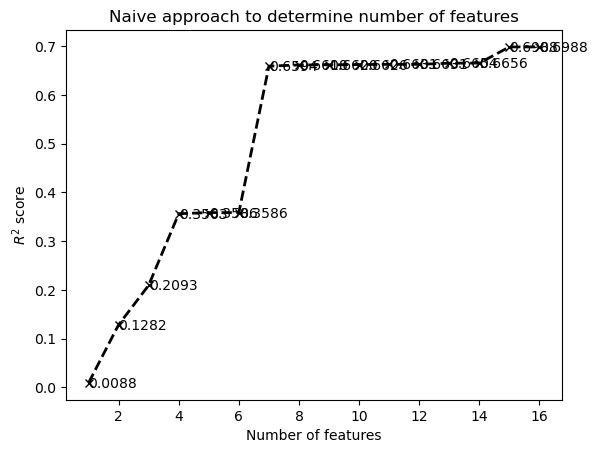

In [78]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


y = new_df["MET"]
X = new_df.copy(deep=True)
X.drop(columns=["MET","activity"],inplace=True)

num_features = 2
lm = LinearRegression()
rfe = RFE(lm,n_features_to_select=num_features).fit(X,y)

lm = LinearRegression()
score = np.zeros(len(X.columns))
num_features = np.arange(1,len(X.columns)+1)
for idx, nf in enumerate(num_features):
    rfe = RFE(lm,n_features_to_select=nf).fit(X,y)
    score[idx] = rfe.score(X,y)
    
fig, ax = plt.subplots(nrows=1,ncols=1)
ax.plot(num_features,score,ls="--",lw=2,marker="x",c="k")
ax.set_xlabel("Number of features")
ax.set_ylabel(r"$R^2$ score")
ax.set_title("Naive approach to determine number of features")
for idx, s in zip(num_features,score):
    ax.annotate(f"{s:.4f}",xy=[idx,s-0.01])

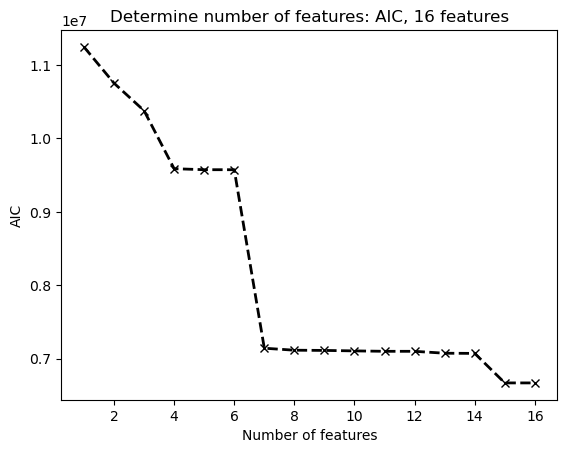

In [79]:
AIC = np.zeros(len(X.columns))
lm = LinearRegression()
for idx, nf in enumerate(num_features):
    rfe = RFE(lm,n_features_to_select=nf).fit(X,y)
    f = rfe.get_feature_names_out()
    new_X = X[f]
    nf_lm = lm.fit(new_X,y)
    y_pred = nf_lm.predict(new_X)
    mse = mean_squared_error(y,y_pred)
    AIC[idx] = 2.0*nf + len(X) * np.log(2.0*np.pi*(mse ** 2.0)) + len(X)

aic_features = np.argmin(AIC) + 1
fig, ax = plt.subplots(nrows=1,ncols=1)
ax.set_xlabel("Number of features")
ax.set_ylabel("AIC")
ax.set_title(f"Determine number of features: AIC, {aic_features} features")
ax.plot(num_features,AIC,ls="--",lw=2,marker="x",c="k")

In [80]:
nf_lm1 = lm.fit(X,y)
score1 = nf_lm.score(X,y)
y_pred1 = nf_lm.predict(X)
mse1 = mean_squared_error(y,y_pred)
AIC[-1] = 2.0*num_features[-1] + len(X) * np.log(2.0*np.pi*(mse ** 2.0)) + len(X)

In [81]:
score1

0.6987938038893613

In [82]:
rfe1 = RFE(lm,n_features_to_select=16).fit(X,y)
print(rfe.get_feature_names_out())

['Subject_ID' 'timestamp' 'activityID' 'heart-rate bpm' 'hand-temp'
 'chest-temp' 'ankle-temp' 'hand-3D-acc ±16g-13bit'
 'chest-3D-acc ±16g-13bit' 'ankle-3D-acc ±16g-13bit' 'hand-3D-gyroscope'
 'chest-3D-gyroscope' 'ankle-3D-gyroscope' 'hand-3D-magnetometer'
 'chest-3D-magnetometer' 'ankle-3D-magnetometer']


In [83]:
print(new_df.dtypes)


Subject_ID                 float64
timestamp                  float64
MET                        float64
activityID                 float64
activity                    object
heart-rate bpm             float64
hand-temp                  float64
chest-temp                 float64
ankle-temp                 float64
hand-3D-acc ±16g-13bit     float64
chest-3D-acc ±16g-13bit    float64
ankle-3D-acc ±16g-13bit    float64
hand-3D-gyroscope          float64
chest-3D-gyroscope         float64
ankle-3D-gyroscope         float64
hand-3D-magnetometer       float64
chest-3D-magnetometer      float64
ankle-3D-magnetometer      float64
dtype: object


In [84]:
features = ['Subject_ID', 'timestamp', 'activityID', 'heart-rate bpm', 'hand-temp',
            'chest-temp', 'ankle-temp', 'hand-3D-acc ±16g-13bit',
            'chest-3D-acc ±16g-13bit', 'ankle-3D-acc ±16g-13bit',
            'hand-3D-gyroscope', 'chest-3D-gyroscope', 'ankle-3D-gyroscope',
            'hand-3D-magnetometer', 'chest-3D-magnetometer', 'ankle-3D-magnetometer']

X2 = new_df[features]
feature = sm.add_constant(X2)

model = sm.OLS(y, feature)
results = model.fit()
results.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MET   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
No. Observations:             1921430   F-statistic:                 2.786e+05
Covariance Type:            nonrobust   Prob (F-statistic):               0.00
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -4.1449      0.058    -71.064      0.000      -4.259      -4.031
Subject_ID                  0.0513      0.000    115.165      0.000       0.050       0.052
timestamp                   0.0007   1.52e-06    459.683      0.000       0.001       0.001
activityID                  0.0718      0.000    449.592      0.000       0.071       0.072
heart-rate bpm              0.0351   5.45e-05    643.681      0.000       0.035       0.035
hand-temp                  -0.0072      0.001     -7.153      0.000      -0.009      -0.005
chest-temp                 -0.0298      0.001    -26.317      0.000      -0.032      -0.028
ankle-temp                 -0.0607      0.001    -57.263      0.000      -0.063      -0.059
hand-3D-acc ±16g-13bit     -0.0061      0.000    -19.537      0.000      -0.007      -0.005
chest-3D-acc ±16g-13bit     0.0907      0.000    191.620      0.000       0.090       0.092
ankle-3D-acc ±16g-13bit    -0.0026      0.000    -10.443      0.000      -0.003      -0.002
hand-3D-gyroscope           0.0019      0.001      1.450      0.147      -0.001       0.004
chest-3D-gyroscope          0.8095      0.004    198.681      0.000       0.801       0.817
ankle-3D-gyroscope          0.0438      0.001     45.247      0.000       0.042       0.046
hand-3D-magnetometer        0.0033   7.73e-05     42.304      0.000       0.003       0.003
chest-3D-magnetometer       0.0007   9.79e-05      6.878      0.000       0.000       0.001
ankle-3D-magnetometer      -0.0071   8.04e-05    -88.310      0.000      -0.007      -0.007
===========================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
new_features = [f for f in features if not f in ["hand-3D-gyroscope"]]

X2 = new_df[new_features]
feature = sm.add_constant(X2)

model = sm.OLS(y, feature)
results = model.fit()
results.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MET   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
No. Observations:             1921430   F-statistic:                 2.972e+05
Covariance Type:            nonrobust   Prob (F-statistic):               0.00
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -4.1439      0.058    -71.052      0.000      -4.258      -4.030
Subject_ID                  0.0513      0.000    115.160      0.000       0.050       0.052
timestamp                   0.0007   1.52e-06    459.765      0.000       0.001       0.001
activityID                  0.0718      0.000    449.778      0.000       0.071       0.072
heart-rate bpm              0.0351   5.45e-05    643.768      0.000       0.035       0.035
hand-temp                  -0.0072      0.001     -7.142      0.000      -0.009      -0.005
chest-temp                 -0.0298      0.001    -26.349      0.000      -0.032      -0.028
ankle-temp                 -0.0607      0.001    -57.272      0.000      -0.063      -0.059
hand-3D-acc ±16g-13bit     -0.0061      0.000    -19.494      0.000      -0.007      -0.005
chest-3D-acc ±16g-13bit     0.0908      0.000    191.717      0.000       0.090       0.092
ankle-3D-acc ±16g-13bit    -0.0026      0.000    -10.395      0.000      -0.003      -0.002
chest-3D-gyroscope          0.8102      0.004    200.543      0.000       0.802       0.818
ankle-3D-gyroscope          0.0437      0.001     45.233      0.000       0.042       0.046
hand-3D-magnetometer        0.0033   7.73e-05     42.288      0.000       0.003       0.003
chest-3D-magnetometer       0.0007   9.79e-05      6.888      0.000       0.000       0.001
ankle-3D-magnetometer      -0.0071   8.04e-05    -88.312      0.000      -0.007      -0.007
===========================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

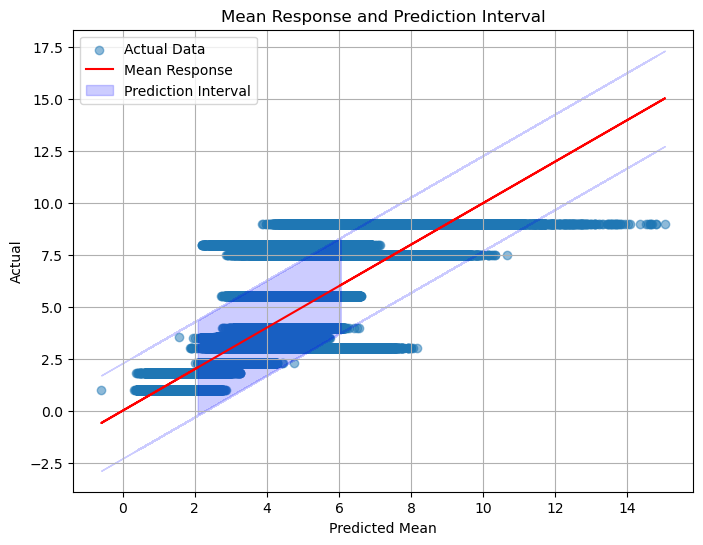

In [86]:
pred_mean = results.fittedvalues
observed_values = y

# Obtain the prediction intervals
pred_ols = results.get_prediction()
pred_frame = pred_ols.summary_frame(alpha=0.05)
pred_lb = pred_frame["obs_ci_lower"]
pred_ub = pred_frame["obs_ci_upper"]

# Plotting
plt.figure(figsize=(8, 6))

# If the dataset is very large, consider plotting a subset of points
# For example, you can randomly sample 1000 points using the .sample() method
# Make sure to use the same random_state to sample from both pred_mean and observed_values
# sample_size = 1000
# pred_mean_sampled = pred_mean.sample(sample_size, random_state=0)
# observed_values_sampled = observed_values.sample(sample_size, random_state=0)
# pred_lb_sampled = pred_lb.sample(sample_size, random_state=0)
# pred_ub_sampled = pred_ub.sample(sample_size, random_state=0)

# Scatter plot of actual data points (use sampled data if necessary)
plt.scatter(pred_mean, observed_values, label='Actual Data', alpha=0.5)  # Use pred_mean_sampled, observed_values_sampled if large dataset

# Mean response line (use sampled data if necessary)
plt.plot(pred_mean, pred_mean, color='red', label='Mean Response')  # Use pred_mean_sampled if large dataset

# Prediction intervals (use sampled data if necessary)
# Ensure pred_mean and pred_lb/pred_ub are sorted by index to prevent lines from crisscrossing
sorted_indices = pred_mean.sort_index().index
plt.fill_between(pred_mean.loc[sorted_indices], pred_lb.loc[sorted_indices], pred_ub.loc[sorted_indices], color='blue', alpha=0.2, label='Prediction Interval')

plt.xlabel('Predicted Mean')
plt.ylabel('Actual')
plt.title('Mean Response and Prediction Interval')
plt.legend()
plt.grid(True)
plt.show()

Using MET as a dependent variable, I could see the R-squared at 0.699 which means a 69% accuracy. The accuracy being 69.9% is what I considered to choosing MET as my dependable variable. Having F-statistics as (2.786e+05) gives a very high statistical significance compared with the activityID F-statistics of (6.048e+04) which can see that the MET F-statistics is higher reason Met has been choosen as my dependable variable. Also all Pvalue had 0 excepet hand-3D-gyroscope which has its pvalue above 0.05 which means hand-3D-gyroscope accepts the hypothesis and there is no statistical significance. I did the statsmodel again excluding hand-3D-gyroscope and now I got all P value  0 and there is a statistical significance and I can reject the null hypothesis because they ae all less than 0.05 pvalue. 

Then looking at the coefficient Subject_ID has a positive coeefficient of 0.0518 which is ha high positive , timestamp had a low positive, activity ID has a positive coeeficient, heart rate has a poaitive coefficient, hest gyroscope has a high positive, it had the highest positive coefficient in this analysis meaning the larger coeeficient suggest a sstrong relationship to MET. Ankle gyroscope had a positive coeeficient, hand and chest magnenometer had a positive coefficient.

### Clustering

In [87]:
active = list(itertools.chain.from_iterable(new_df.loc[new_df['MET'] > 3, ["activityID"]].values.tolist()))
inactive = list(itertools.chain.from_iterable(new_df.loc[new_df['MET'] <= 3, ["activityID"]].values.tolist()))

new_df.insert(loc=2, column='active', value=['active' if x > 3 else 'inactive' for x in new_df['MET']])


In [88]:
new_df

,Subject_ID,timestamp,active,MET,activityID,activity,heart-rate bpm,hand-temp,chest-temp,ankle-temp,hand-3D-acc ±16g-13bit,chest-3D-acc ±16g-13bit,ankle-3D-acc ±16g-13bit,hand-3D-gyroscope,chest-3D-gyroscope,ankle-3D-gyroscope,hand-3D-magnetometer,chest-3D-magnetometer,ankle-3D-magnetometer
2928,101.0,37.66,inactive,1.0,1.0,lying,100.0,30.375,32.1875,30.75,5.360660,2.707567,2.662032,0.007228,0.000145,-0.007684,-26.325367,-1.962178,-52.113767
2929,101.0,37.67,inactive,1.0,1.0,lying,100.0,30.375,32.1875,30.75,5.236503,2.733360,2.597479,-0.051923,-0.021601,0.009278,-26.428167,-2.020103,-51.858967
2930,101.0,37.68,inactive,1.0,1.0,lying,100.0,30.375,32.1875,30.75,5.085573,2.703949,2.571709,-0.075399,-0.003142,-0.030899,-25.951613,-2.079840,-51.578933
2931,101.0,37.69,inactive,1.0,1.0,lying,100.0,30.375,32.1875,30.75,5.086983,2.744582,2.636982,-0.053495,-0.035405,-0.008136,-26.023973,-2.057705,-51.915767
2932,101.0,37.70,inactive,1.0,1.0,lying,100.0,30.375,32.1875,30.75,5.217407,2.796648,2.661912,-0.027902,-0.017464,-0.017951,-26.037313,-2.441961,-51.737067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872014,109.0,95.05,active,9.0,24.0,rope jumping,162.0,25.125,32.3750,31.50,5.552053,2.250210,1.635953,-0.073124,-0.069508,-0.024646,-23.957073,3.941733,-15.543323
2872015,109.0,95.06,active,9.0,24.0,rope jumping,162.0,25.125,32.3750,31.50,5.537257,2.304086,1.634507,-0.053589,-0.072864,0.004761,-23.730043,3.486200,-15.595791
2872016,109.0,95.07,active,9.0,24.0,rope jumping,162.0,25.125,32.3750,31.50,5.471683,2.253289,1.583083,-0.045453,-0.061935,0.003369,-23.828237,3.469400,-15.437418
2872017,109.0,95.08,active,9.0,24.0,rope jumping,162.0,25.125,32.3750,31.50,5.420900,2.316360,1.595727,-0.044983,-0.017922,-0.018141,-23.496437,3.687233,-15.400991


In [89]:
active_df = pd.get_dummies(new_df, columns=["active"], drop_first=True, dtype=float)
active_df.head(5)

,Subject_ID,timestamp,MET,activityID,activity,heart-rate bpm,hand-temp,chest-temp,ankle-temp,hand-3D-acc ±16g-13bit,chest-3D-acc ±16g-13bit,ankle-3D-acc ±16g-13bit,hand-3D-gyroscope,chest-3D-gyroscope,ankle-3D-gyroscope,hand-3D-magnetometer,chest-3D-magnetometer,ankle-3D-magnetometer,active_inactive
2928,101.0,37.66,1.0,1.0,lying,100.0,30.375,32.1875,30.75,5.360660,2.707567,2.662032,0.007228,0.000145,-0.007684,-26.325367,-1.962178,-52.113767,1.0
2929,101.0,37.67,1.0,1.0,lying,100.0,30.375,32.1875,30.75,5.236503,2.733360,2.597479,-0.051923,-0.021601,0.009278,-26.428167,-2.020103,-51.858967,1.0
2930,101.0,37.68,1.0,1.0,lying,100.0,30.375,32.1875,30.75,5.085573,2.703949,2.571709,-0.075399,-0.003142,-0.030899,-25.951613,-2.079840,-51.578933,1.0
2931,101.0,37.69,1.0,1.0,lying,100.0,30.375,32.1875,30.75,5.086983,2.744582,2.636982,-0.053495,-0.035405,-0.008136,-26.023973,-2.057705,-51.915767,1.0
2932,101.0,37.70,1.0,1.0,lying,100.0,30.375,32.1875,30.75,5.217407,2.796648,2.661912,-0.027902,-0.017464,-0.017951,-26.037313,-2.441961,-51.737067,1.0


In [90]:
#del active_df['active_inactive']

In [91]:
active_df.drop('activity', axis=1, inplace=True)

In [92]:
active_df.columns

Index(['Subject_ID', 'timestamp', 'MET', 'activityID', 'heart-rate bpm',
       'hand-temp', 'chest-temp', 'ankle-temp', 'hand-3D-acc ±16g-13bit',
       'chest-3D-acc ±16g-13bit', 'ankle-3D-acc ±16g-13bit',
       'hand-3D-gyroscope', 'chest-3D-gyroscope', 'ankle-3D-gyroscope',
       'hand-3D-magnetometer', 'chest-3D-magnetometer',
       'ankle-3D-magnetometer', 'active_inactive'],
      dtype='object')

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


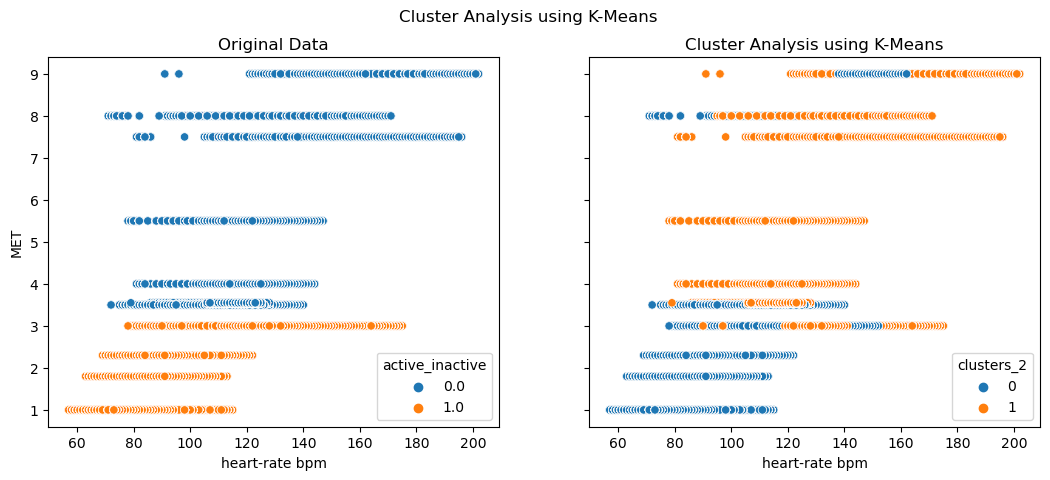

In [93]:
from sklearn.cluster import KMeans

features_to_cluster = active_df[['Subject_ID', 'timestamp', 'MET', 'activityID', 'heart-rate bpm',
       'hand-temp', 'chest-temp', 'ankle-temp', 'hand-3D-acc ±16g-13bit',
       'chest-3D-acc ±16g-13bit', 'ankle-3D-acc ±16g-13bit',
       'hand-3D-gyroscope', 'chest-3D-gyroscope', 'ankle-3D-gyroscope',
       'hand-3D-magnetometer', 'chest-3D-magnetometer',
       'ankle-3D-magnetometer', 'active_inactive']]

cluster_df = active_df.copy(deep=True)

n_clusters = 2
name = f"clusters_{n_clusters}"

# Fit KMeans on the selected features
kmeans = KMeans(n_clusters=n_clusters).fit(features_to_cluster)

cluster_df[name] = kmeans.labels_

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)

# Original scatter plot
sns.scatterplot(data=active_df, x="heart-rate bpm", y="MET", hue=active_df.active_inactive, ax=axes[0])
axes[0].set_title("Original Data")

# Scatter plot with clusters
sns.scatterplot(data=active_df, x="heart-rate bpm", y="MET", hue=cluster_df[name], ax=axes[1])
axes[1].set_title("Cluster Analysis using K-Means")

fig.set_figwidth(fig.get_figwidth() * 2.0)
fig.suptitle("Cluster Analysis using K-Means")
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


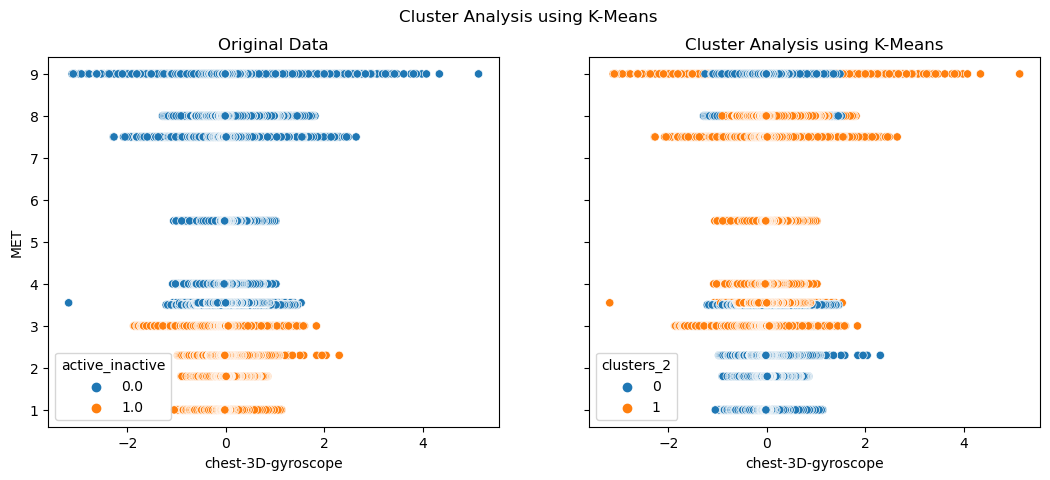

In [94]:
features_to_cluster = active_df[['Subject_ID', 'timestamp', 'MET', 'activityID', 'heart-rate bpm',
       'hand-temp', 'chest-temp', 'ankle-temp', 'hand-3D-acc ±16g-13bit',
       'chest-3D-acc ±16g-13bit', 'ankle-3D-acc ±16g-13bit',
       'hand-3D-gyroscope', 'chest-3D-gyroscope', 'ankle-3D-gyroscope',
       'hand-3D-magnetometer', 'chest-3D-magnetometer',
       'ankle-3D-magnetometer', 'active_inactive']]

cluster_df = active_df.copy(deep=True)

n_clusters = 2
name = f"clusters_{n_clusters}"

# Fit KMeans on the selected features
kmeans = KMeans(n_clusters=n_clusters).fit(features_to_cluster)

cluster_df[name] = kmeans.labels_

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)

# Original scatter plot
sns.scatterplot(data=active_df, x="chest-3D-gyroscope", y="MET", hue=active_df.active_inactive, ax=axes[0])
axes[0].set_title("Original Data")

# Scatter plot with clusters
sns.scatterplot(data=active_df, x="chest-3D-gyroscope", y="MET", hue=cluster_df[name], ax=axes[1])
axes[1].set_title("Cluster Analysis using K-Means")

fig.set_figwidth(fig.get_figwidth() * 2.0)
fig.suptitle("Cluster Analysis using K-Means")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


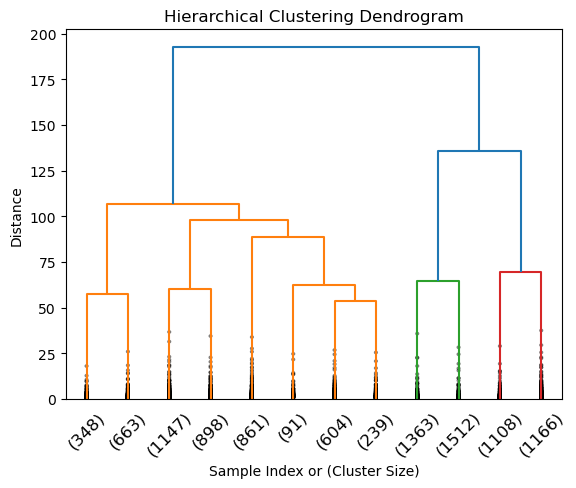

         Subject_ID    timestamp  activityID  heart-rate bpm  \
Cluster                                                        
0        104.679035  2630.918765    8.146568      126.041641   
1        104.601583  1296.429626   15.750220      101.054529   
2        104.474783   482.650786    2.007304       81.394783   

         chest-3D-acc ±16g-13bit  chest-3D-gyroscope  ankle-3D-gyroscope  \
Cluster                                                                    
0                       1.818703            0.027137            0.002285   
1                       2.152871           -0.059048           -0.062103   
2                       3.399768           -0.005495           -0.001498   

         hand-3D-magnetometer  chest-3D-magnetometer       MET  
Cluster                                                         
0                    -2.03108              -5.290366  5.244702  
1                   -12.22379             -12.572181  2.715765  
2                    -7.07905         

In [95]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

selected_features = ['Subject_ID', 'timestamp', 'activityID','heart-rate bpm','chest-3D-acc ±16g-13bit',
                    'chest-3D-gyroscope','ankle-3D-gyroscope','hand-3D-magnetometer','chest-3D-magnetometer']  # Replace with your actual feature names

data_for_clustering = active_df[selected_features + ['MET']]

# Downsample the data
sample_size = 10000  # Adjust the sample size based on available memory
if len(data_for_clustering) > sample_size:
    data_for_clustering = data_for_clustering.sample(sample_size, random_state=42)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Perform hierarchical clustering
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clusters = model.fit_predict(scaled_data)

# Add cluster labels to the DataFrame
data_for_clustering['Cluster'] = clusters

# Dendrogram for visualization (optional)
linkage_matrix = linkage(scaled_data, method='ward')
dendrogram(linkage_matrix, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=12., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.show()

# Explore the results
cluster_summary = data_for_clustering.groupby('Cluster').mean()
print(cluster_summary)

Choosing met as my dependable variable, I grouped it into active and inactive. Active activities are activities greater than 3 and above, inactive are activities from 3 and below. Clustering was done on the chestt gyroscope which had a high coefficient. I could say MET had a strong dependent on them. I didn't use activity ID because the where grouped sequencially but knowing the met performance, you can trace the activity that was done

### Conclusion

In conclusion,the regression model, based on the provided summary, appears to have good overall fit and statistically significant predictors. The positive or negative coefficients suggest the direction of the relationship, and the magnitude of the coefficients provides insights into the strength of the features. 

I recommend using a better model for this analysis or refining the model. There were negative coefficient, this could be due to some instrument not having impact based on the activities performed.
By iteratively refining the model and considering these recommendations, you can enhance its accuracy and interpretability, leading to more meaningful insights into the factors influencing MET levels during physical activities.

### Reference/ Resources

OpenAI. (2023). ChatGPT (Mar 14 version) [Large language model]

Kylie Ying. (Sep 26, 2022).  Machine Learning [Video]. YouTube. https://youtu.be/i_LwzRVP7bg?si=kmPY_3WVWkv0H2ZX

James Van Yperen. Data Science Reasearch Method. Lecture Note